# COVID-19 Analysis & Visualizations

By [**Francisco Ramos**](https://github.com/jscriptcoder)

---

**Table of Content**
1. [Setup](#Setup)
2. [Loading Dataset](#Loading-Dataset)
    - [Dataset Info](#Dataset-Info)
3. [Preprocessing](#Preprocessing)
    - [Missing Values](#Missin-Values)
    - [Renaming Countries](#Renaming-Countries)
    - [Renaming Columns](#Renaming-Columns)
    - [Formatting Dates](#Formatting-Dates)
    - [Processing Columns](#Processing-Columns)
4. [Analysis & Visualizations](#Analysis-&-Visualizations)
    - [World Cases](#World-Cases)
    - [Animated Map](#Animated-Map)
    - [Top Countries](#Top-Countries)
5. [European Countries and Switzerland](#European-Countries-and-Switzerland)
    - [Italy](#Italy)
    - [Spain](#Spain)
    - [Germany](#Germany)
    - [France](#France)
    - [United Kingdom](#United-Kingdom)
    - [Switzerland](#Switzerland)
6. [Diamond Princess Cruise](#Diamond-Princess-Cruise)
7. [Loading Other Details](#Loading-Other-Details)
    - [Listing Symptoms](#Listing-Symptoms)
    - [Age Distribution](#Age-Distribution)
    - [Sex Distribution](#Sex-Distribution)
    - [Based on Outcome](#Based-on-Outcome)
        - [Critical Cases by Age](#Critical-Cases-by-Age)
        - [Critical Cases by Sex](#Critical-Cases-by-Sex)

---

## Setup

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import math
import re
import warnings

warnings.filterwarnings("ignore")

In [120]:
from utils import total_cases_pie, \
    total_cases_lineplot, \
    mortality_rate, \
    recovery_rate, \
    total_latest_barplot, \
    daily_cases, \
    total_cases_by_country, \
    total_cases_map

# Global styles for the charts
sns.set(style='darkgrid', )
plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', figsize=(20,10), titlesize=20)
plt.rc('lines', linewidth=4)

## Loading Dataset

In [121]:
path_to_dataset = 'datasets'

In [122]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset Info

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8509 entries, 0 to 8508
Data columns (total 8 columns):
SNo                8509 non-null int64
ObservationDate    8509 non-null object
Province/State     4761 non-null object
Country/Region     8509 non-null object
Last Update        8509 non-null object
Confirmed          8509 non-null float64
Deaths             8509 non-null float64
Recovered          8509 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 531.9+ KB


In [124]:
data.describe()

SNo     Confirmed       Deaths     Recovered
count  8509.000000   8509.000000  8509.000000   8509.000000
mean   4255.000000    704.421201    25.542955    245.788342
std    2456.481054   5111.664699   252.402842   2774.093868
min       1.000000      0.000000     0.000000      0.000000
25%    2128.000000      2.000000     0.000000      0.000000
50%    4255.000000     18.000000     0.000000      0.000000
75%    6382.000000    140.000000     1.000000     10.000000
max    8509.000000  69176.000000  6820.000000  60324.000000

In [125]:
data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

## Preprocessing

### Missing Values

In [126]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3748
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [127]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

### Renaming Countries

In [128]:
set(data['Country/Region'])

{' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Gambia, The',
 'G

In [129]:
def process_country_name(country):
    country = country.strip()
    
    if country == "('St. Martin',)":
        country = 'Saint Martin'
    elif country == 'Mainland China':
        country = 'China'
    elif country == 'UK':
        country = 'United Kingdom'
    elif country == 'US':
        country = 'United States'
    elif country == 'occupied Palestinian territory':
        country = 'Palestine'
    
    return country

In [130]:
data['Country/Region'] = data['Country/Region'].apply(process_country_name)

### Renaming Columns

In [131]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [132]:
data.tail()

SNo    Observed Province/State Country/Region              Updated  \
8504  8505  03/24/2020  Wuhan Evacuee  United States  2020-03-24 23:41:50   
8505  8506  03/24/2020        Wyoming  United States  2020-03-24 23:41:50   
8506  8507  03/24/2020       Xinjiang          China  2020-03-24 23:41:50   
8507  8508  03/24/2020         Yunnan          China  2020-03-24 23:41:50   
8508  8509  03/24/2020       Zhejiang          China  2020-03-24 23:41:50   

      Confirmed  Deaths  Recovered  
8504        4.0     0.0        0.0  
8505       29.0     0.0        0.0  
8506       76.0     3.0       73.0  
8507      176.0     2.0      172.0  
8508     1240.0     1.0     1221.0

### Formatting Dates

In [133]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [134]:
data.head()

SNo   Observed Province/State Country/Region             Updated  \
0    1 2020-01-22          Anhui          China 2020-01-22 17:00:00   
1    2 2020-01-22        Beijing          China 2020-01-22 17:00:00   
2    3 2020-01-22      Chongqing          China 2020-01-22 17:00:00   
3    4 2020-01-22         Fujian          China 2020-01-22 17:00:00   
4    5 2020-01-22          Gansu          China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

### Processing Columns

In [135]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered or active cases

## Analysis & Visualizations

### World Cases

In [136]:
total_cases = data.sort_values('Observed').groupby(['Observed']).sum() # index = 'Observed' column

In [137]:
total_cases\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

In [138]:
print('First Observabled Date:', min(total_cases.index).strftime('%b %d, %Y'))
print('Last Observabled Date:', max(total_cases.index).strftime('%b %d, %Y'))
print('Total days observed:', len(total_cases))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 24, 2020
Total days observed: 63


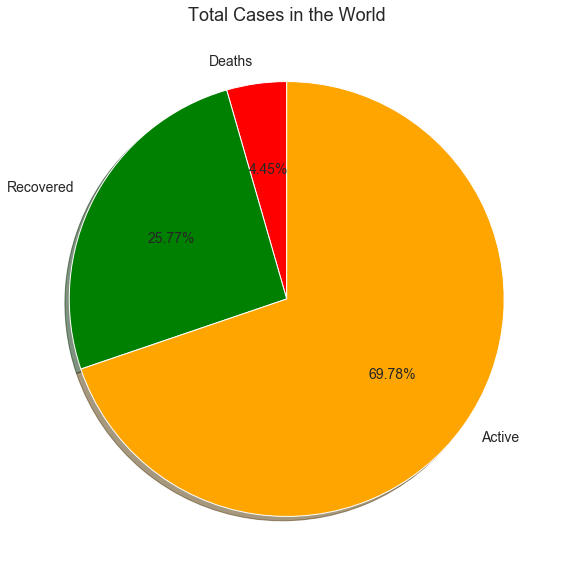

In [139]:
total_cases_pie(total_cases, 'Total Cases in the World')

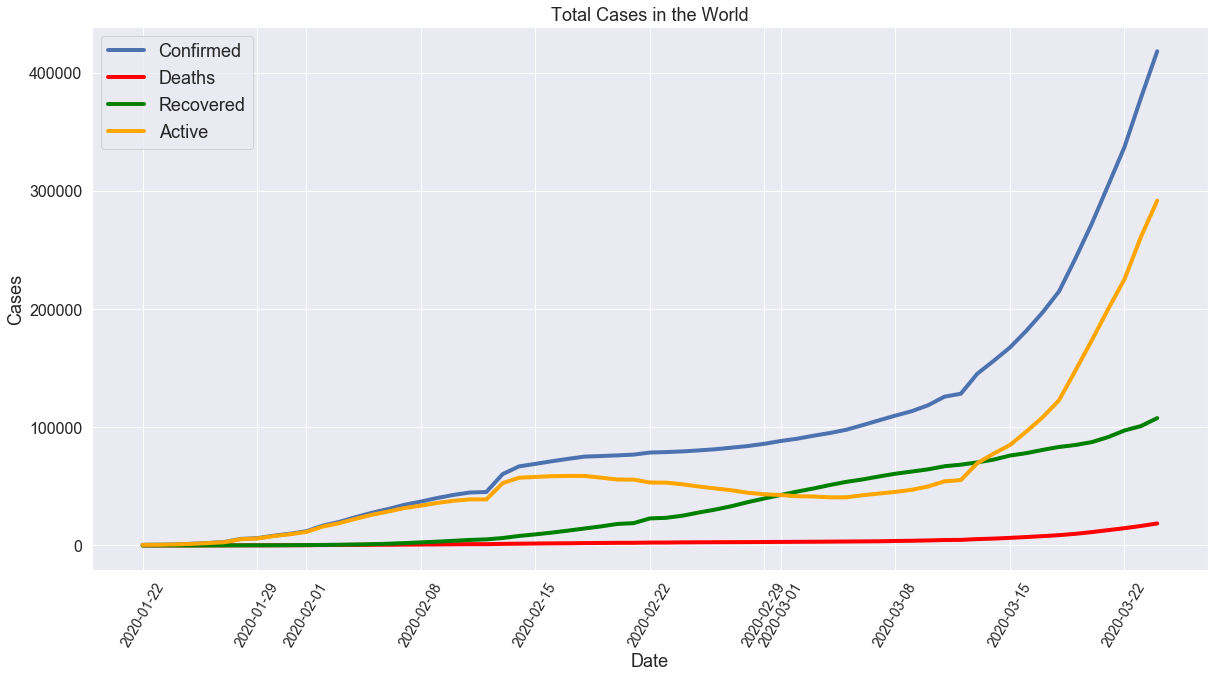

In [140]:
total_cases_lineplot(total_cases, 'Total Cases in the World')

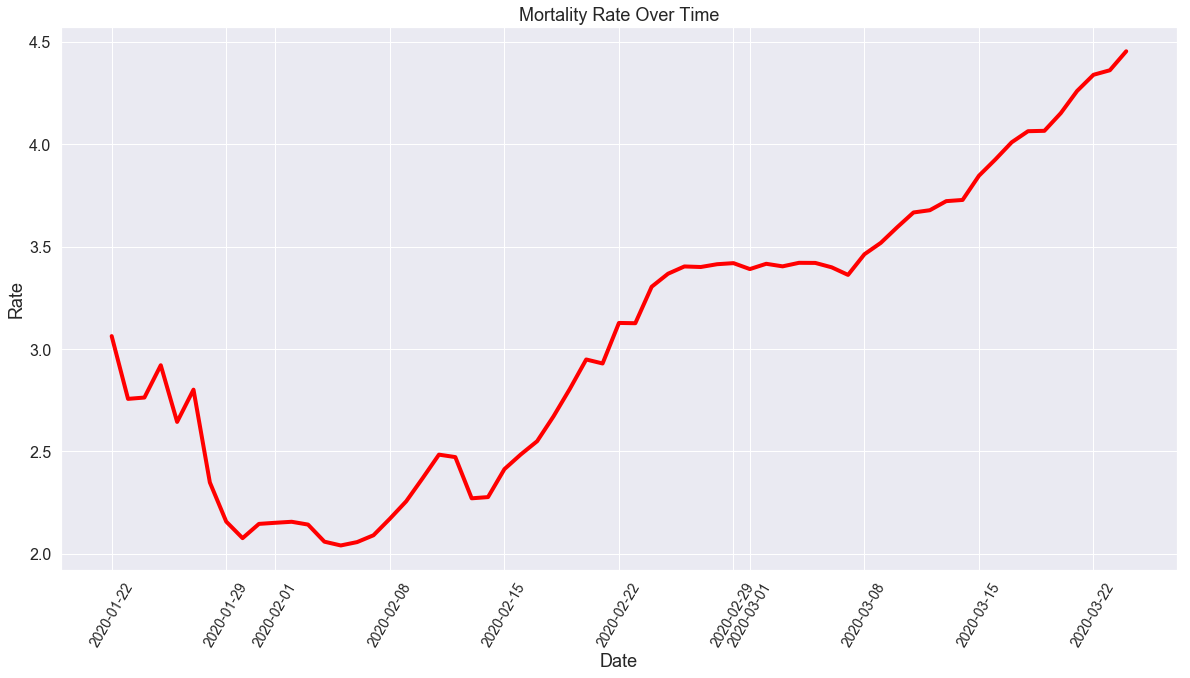

In [141]:
mortality_rate(total_cases, 'Mortality Rate Over Time')

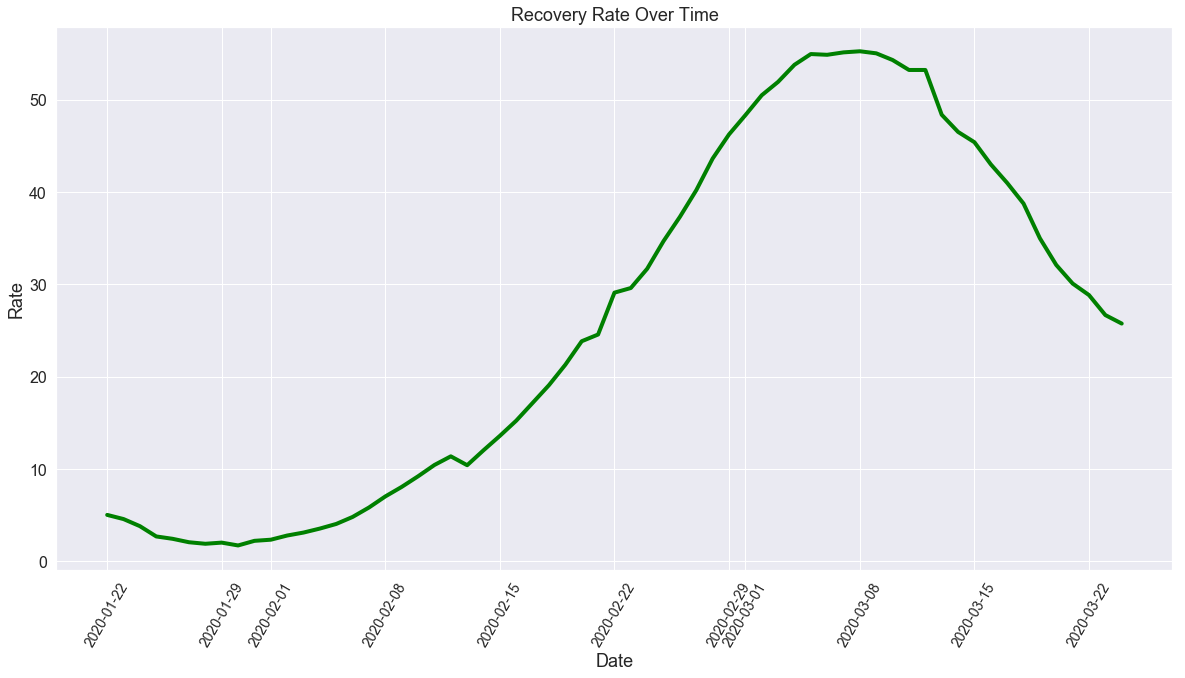

In [142]:
recovery_rate(total_cases, 'Recovery Rate Over Time')

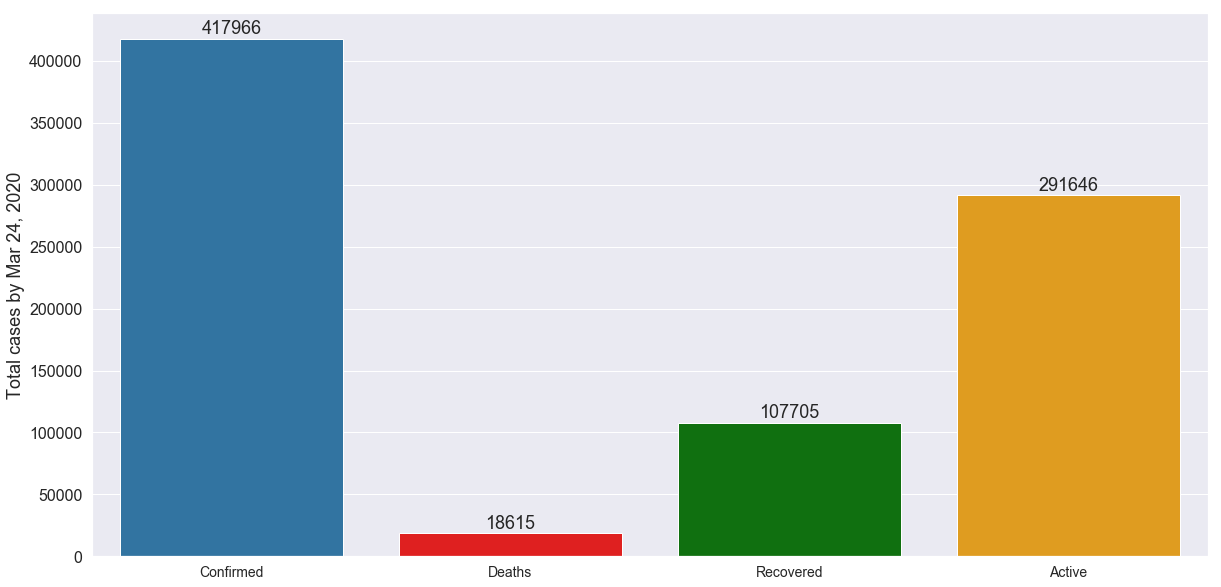

In [143]:
total_latest_barplot(total_cases)

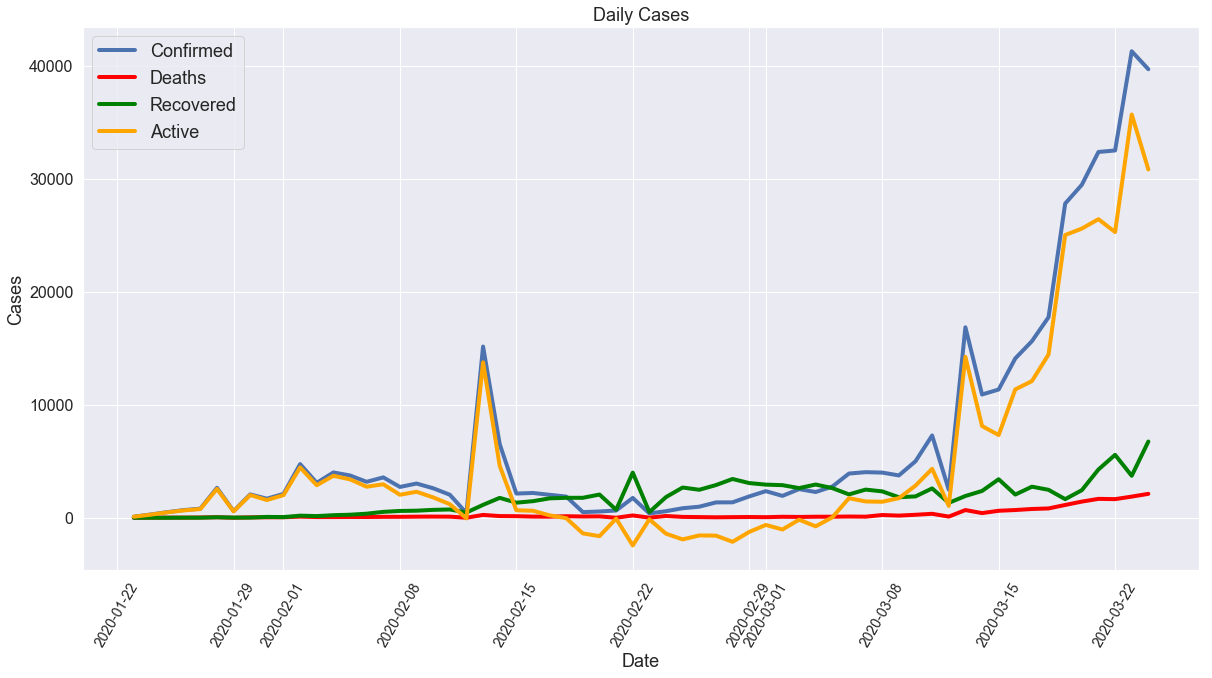

In [144]:
daily_cases(total_cases, 'Daily Cases')

### Animated Map

Dataset from https://www.kaggle.com/imdevskp/corona-virus-report

In [145]:
data_with_location = pd.read_csv(f'{path_to_dataset}/complete_data_new_format.csv')
data_with_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616 entries, 0 to 15615
Data columns (total 7 columns):
Province/State    4672 non-null object
Country/Region    15616 non-null object
Lat               15616 non-null float64
Long              15616 non-null float64
Date              15616 non-null object
Confirmed         15616 non-null int64
Deaths            15616 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 854.1+ KB


In [146]:
# Preparing dataset to display on a map
data_with_location.drop(['Province/State', 'Country/Region'], axis=1, inplace=True)
data_with_location['Date'] = data_with_location['Date'].apply(pd.to_datetime)
data_with_location.sort_values('Date', inplace=True)
data_with_location['Date'] = data_with_location['Date'].dt.strftime('%m/%d/%Y')
data_with_location['Confirmed_size'] = np.round(data_with_location['Confirmed'].pow(0.4), 2)
data_with_location['Deaths_size'] = np.round(data_with_location['Deaths'].pow(0.4), 2)
data_with_location.dropna(inplace=True)

In [147]:
total_cases_map(data_with_location, 'Confirmed', px.colors.sequential.Viridis)

In [148]:
total_cases_map(data_with_location, 'Deaths', 'Inferno')

### Top Countries

In [149]:
latest = data[data['Observed'] == max(data['Observed'])]
total_per_country = latest.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()

In [150]:
top_num = 10
top_ten = total_per_country.sort_values('Confirmed', ascending=False)[:top_num]

print(f'Top {top_num} Countries:')
top_ten.style.background_gradient(cmap='Reds')

Top 10 Countries:


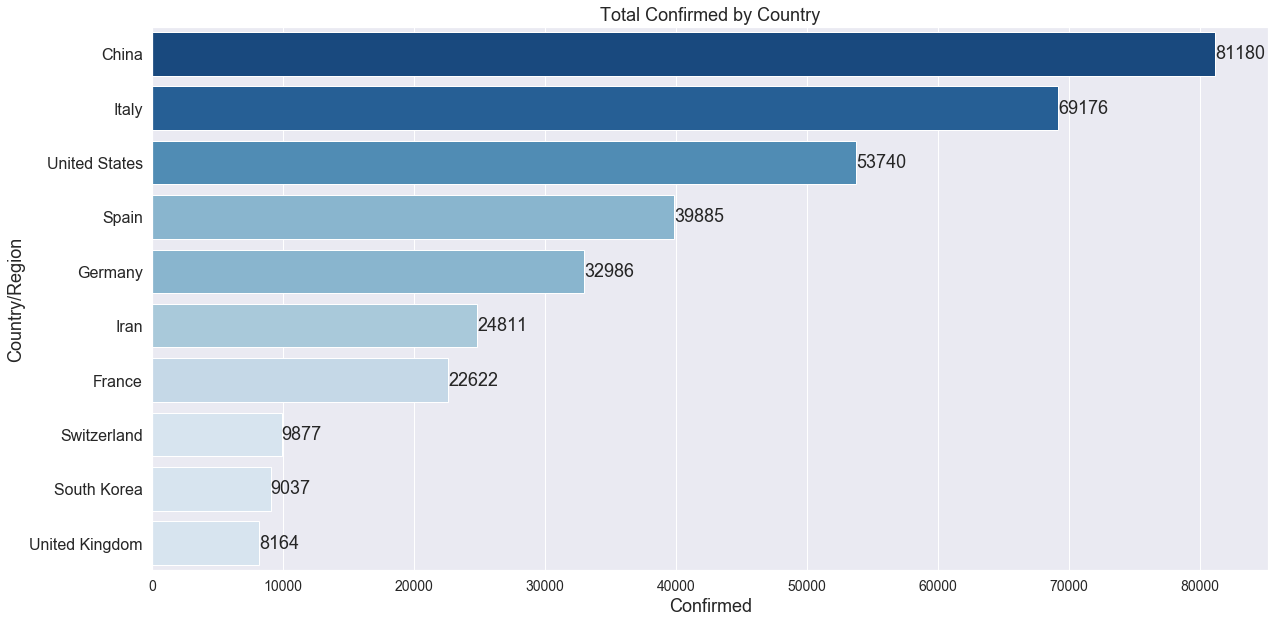

In [151]:
total_cases_by_country(top_ten, 'Confirmed', 'Blues_r')

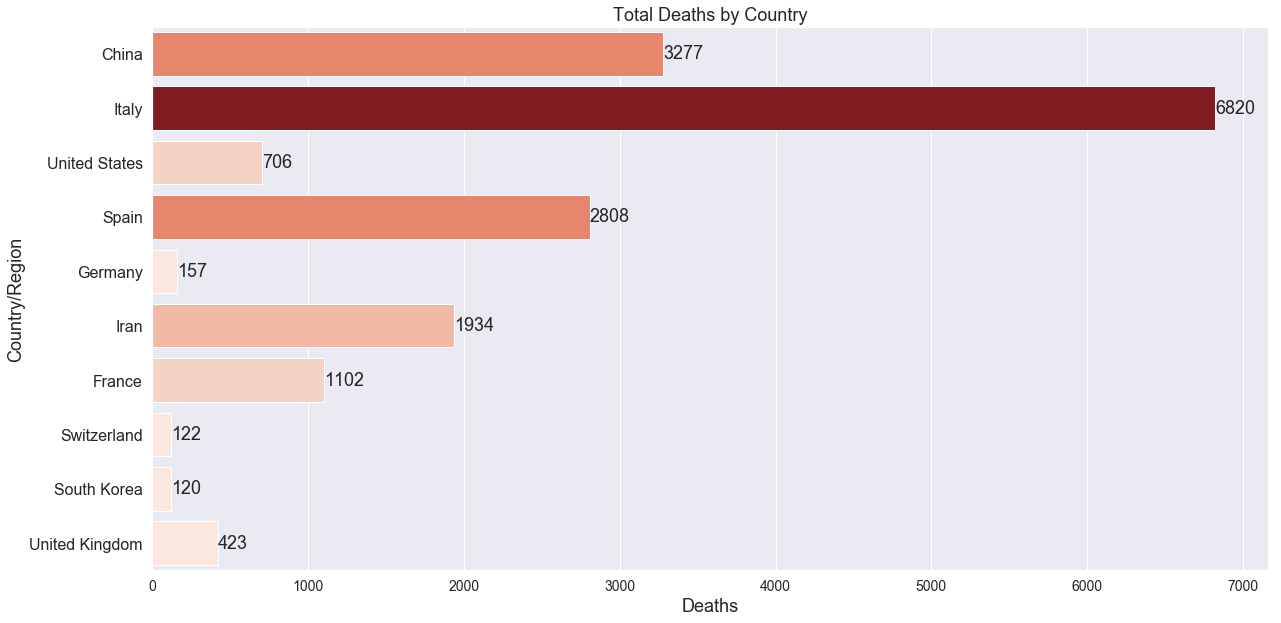

In [152]:
total_cases_by_country(top_ten, 'Deaths', 'Reds_r')

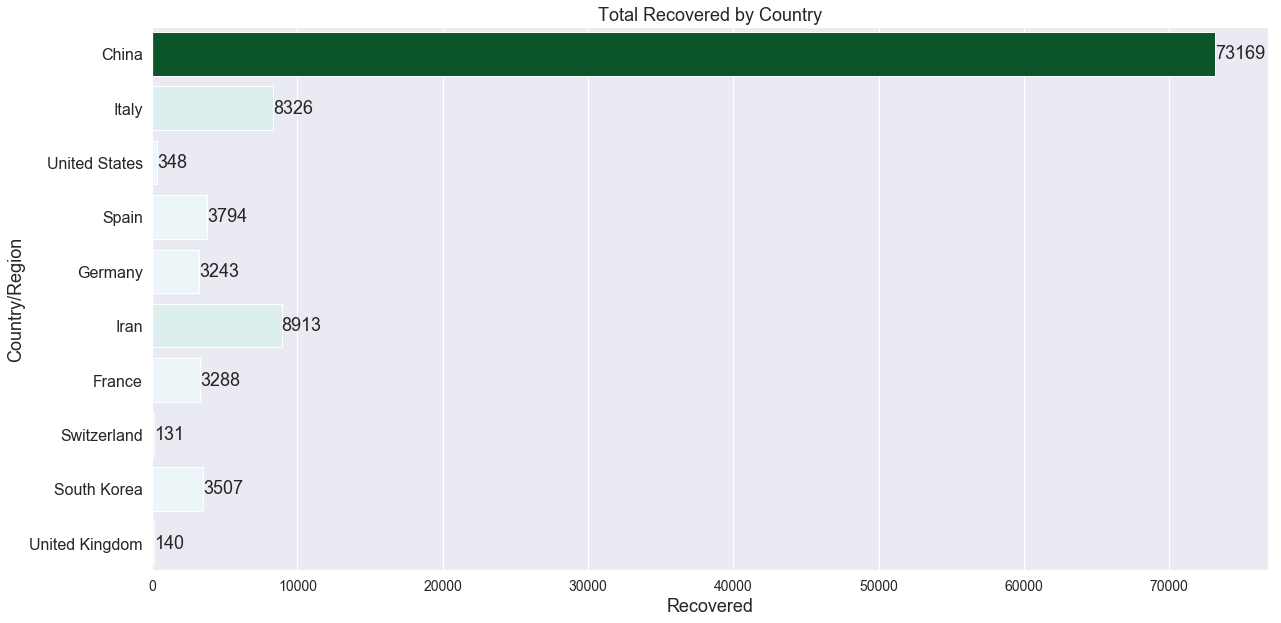

In [153]:
total_cases_by_country(top_ten, 'Recovered', 'BuGn_r')

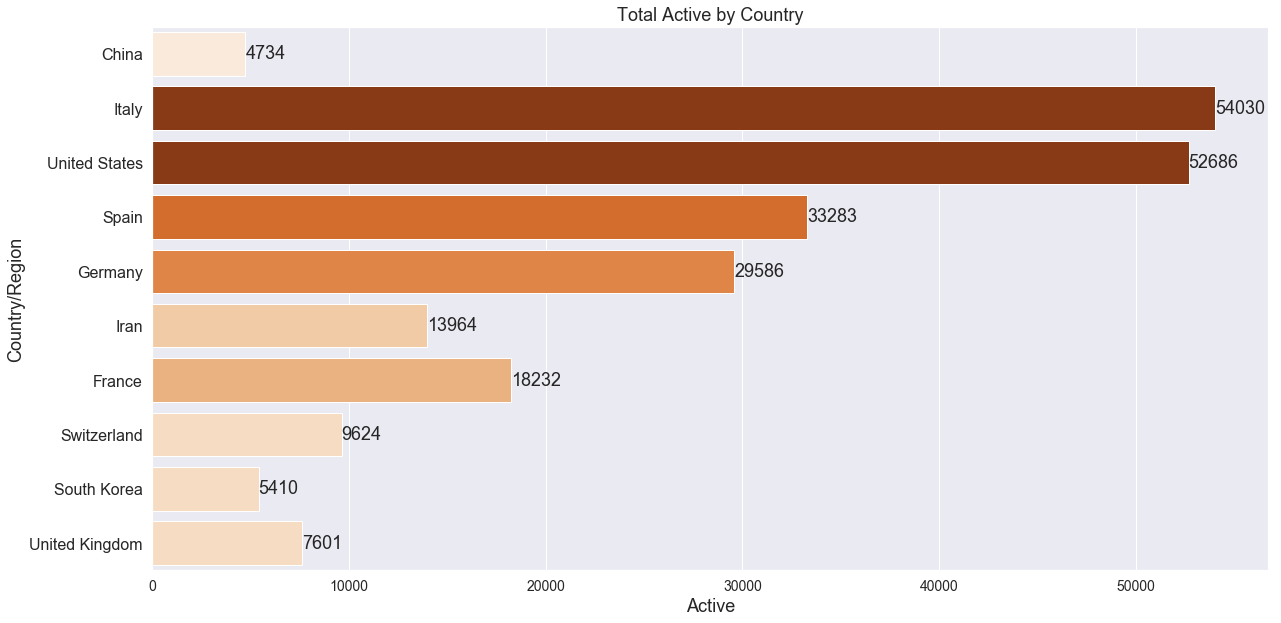

In [154]:
total_cases_by_country(top_ten, 'Active', 'Oranges_r')

## European Countries and Switzerland

In [155]:
italy = data[data['Country/Region'] == 'Italy']
spain = data[data['Country/Region'] == 'Spain']
germany = data[data['Country/Region'] == 'Germany']
france = data[data['Country/Region'] == 'France']
ch = data[data['Country/Region'] == 'Switzerland']
uk = data[data['Country/Region'] == 'United Kingdom']

### Italy

In [156]:
total_cases_italy = italy.sort_values('Observed').groupby(['Observed']).sum()

In [157]:
total_cases_italy\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

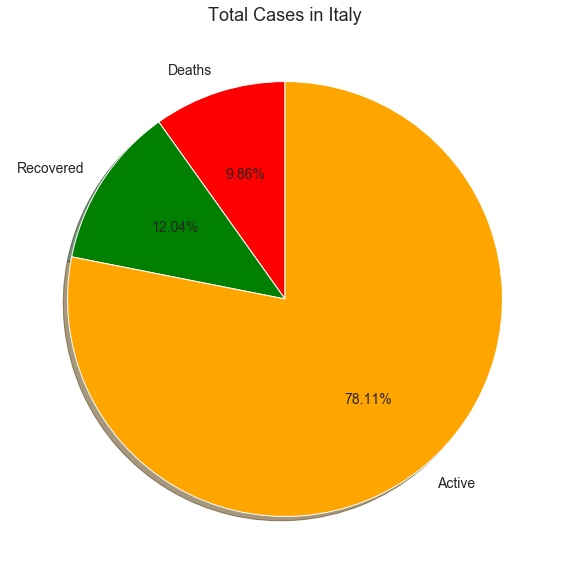

In [158]:
total_cases_pie(total_cases_italy, 'Total Cases in Italy')

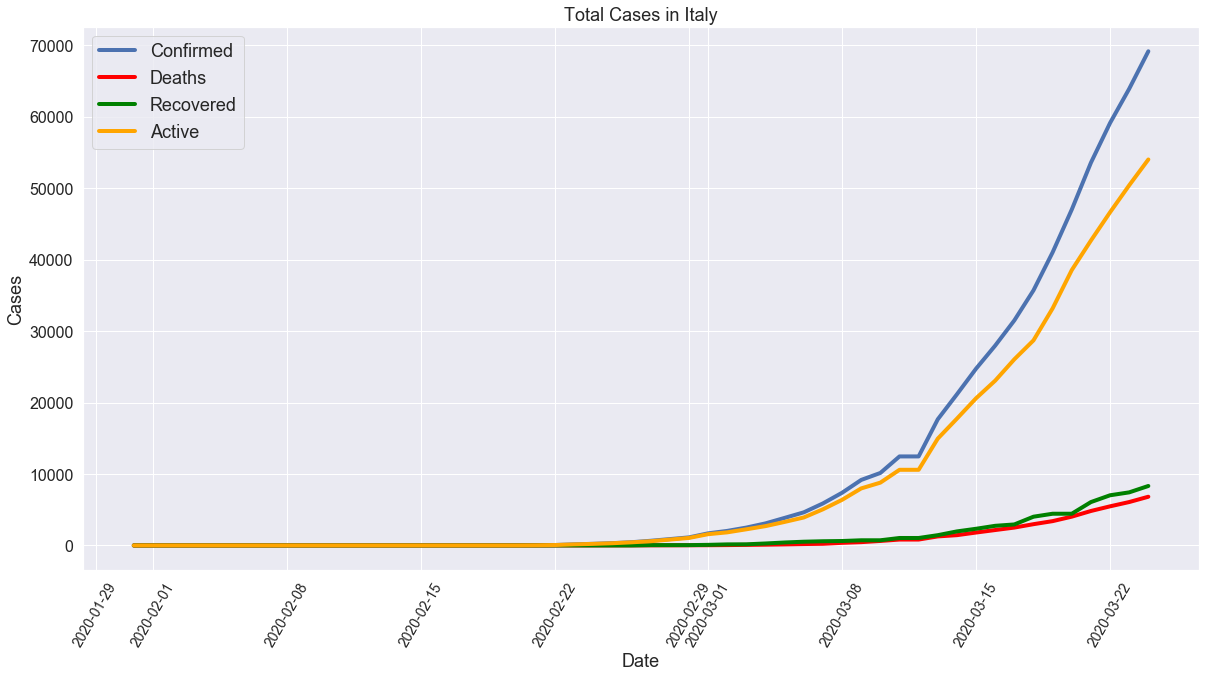

In [159]:
total_cases_lineplot(total_cases_italy, 'Total Cases in Italy')

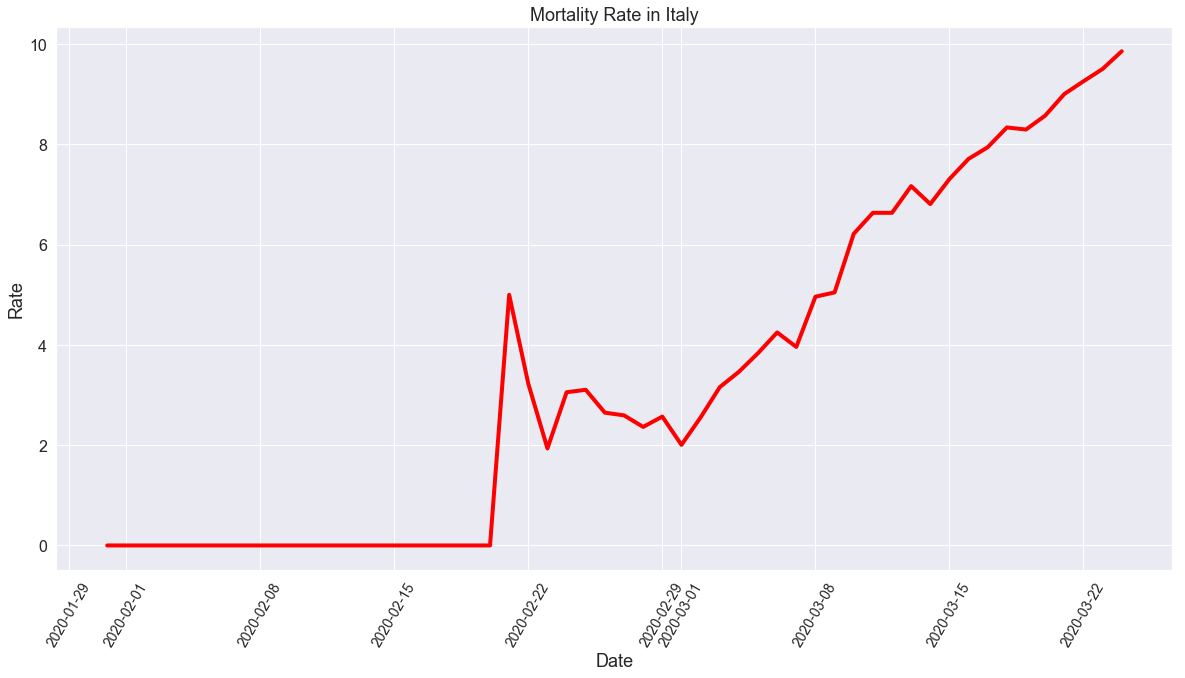

In [160]:
mortality_rate(total_cases_italy, 'Mortality Rate in Italy')

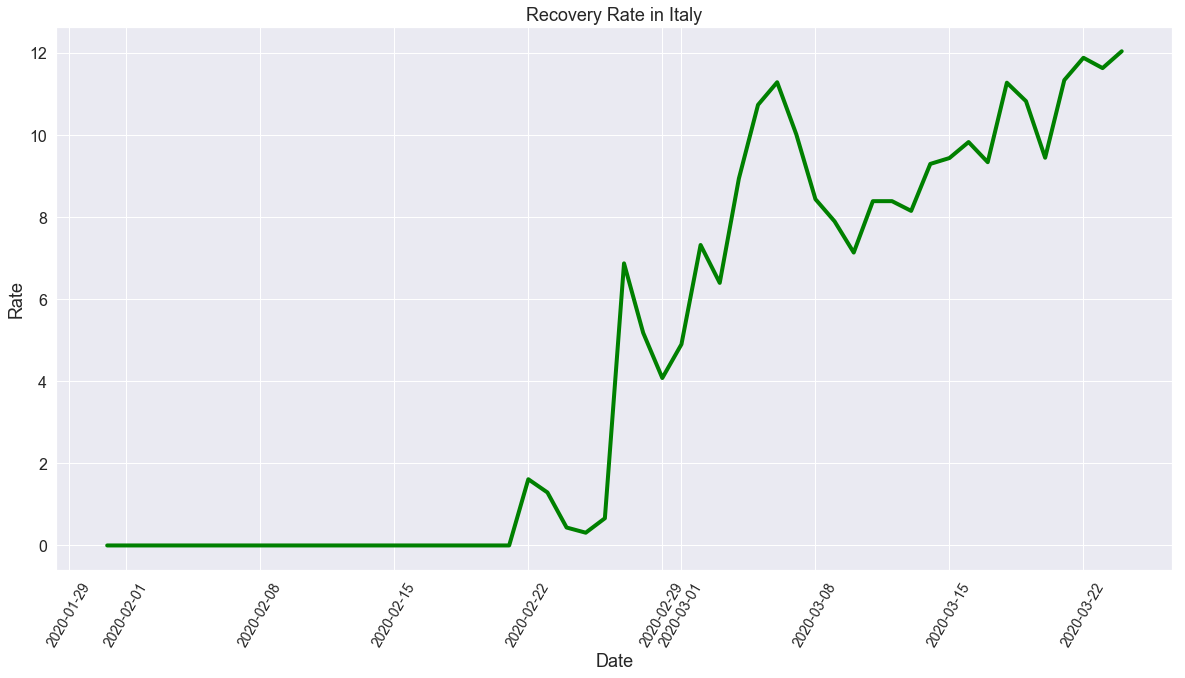

In [161]:
recovery_rate(total_cases_italy, 'Recovery Rate in Italy')

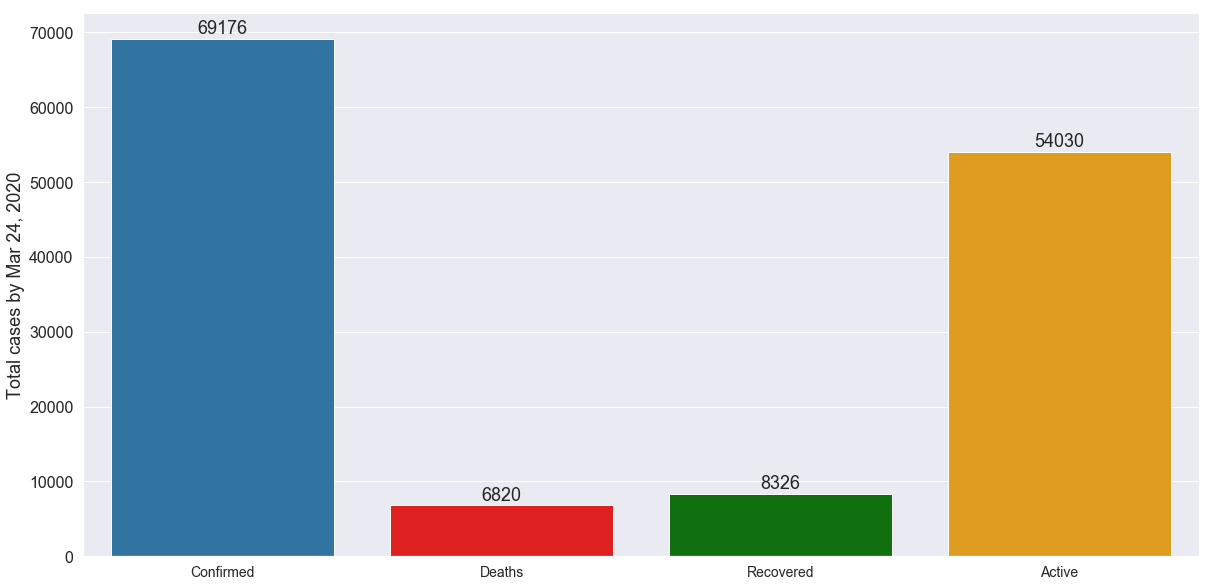

In [162]:
total_latest_barplot(total_cases_italy)

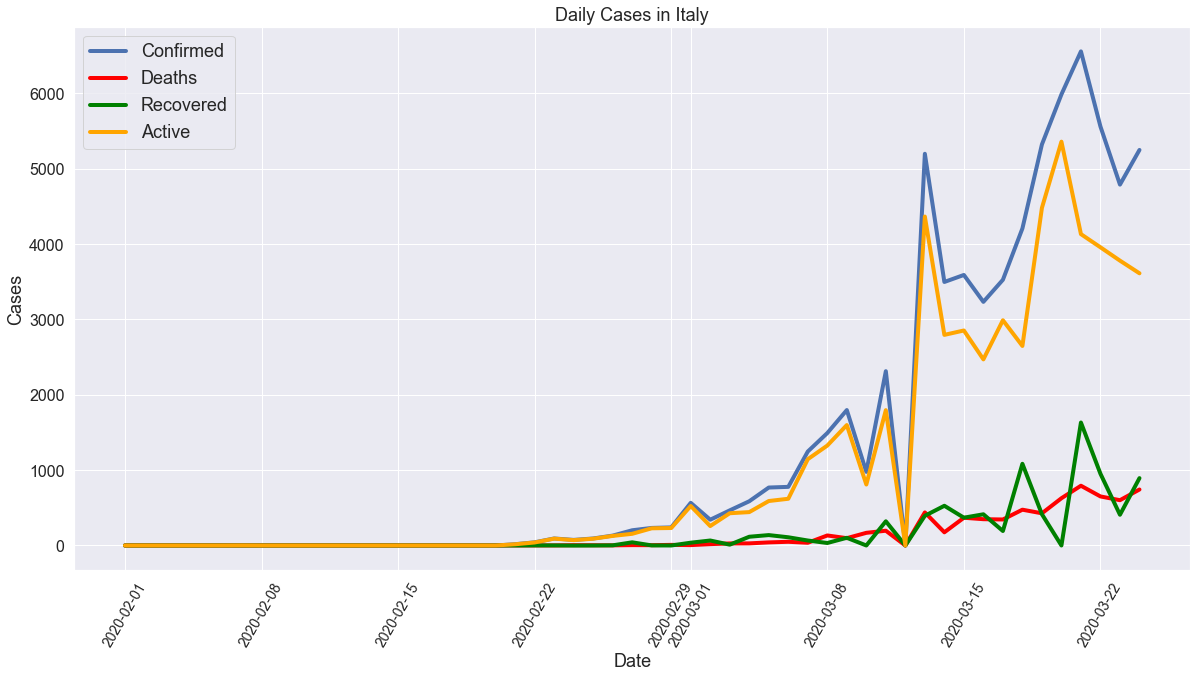

In [163]:
daily_cases(total_cases_italy, 'Daily Cases in Italy')

### Spain

In [164]:
total_cases_spain = spain.sort_values('Observed').groupby(['Observed']).sum()

In [165]:
total_cases_spain\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

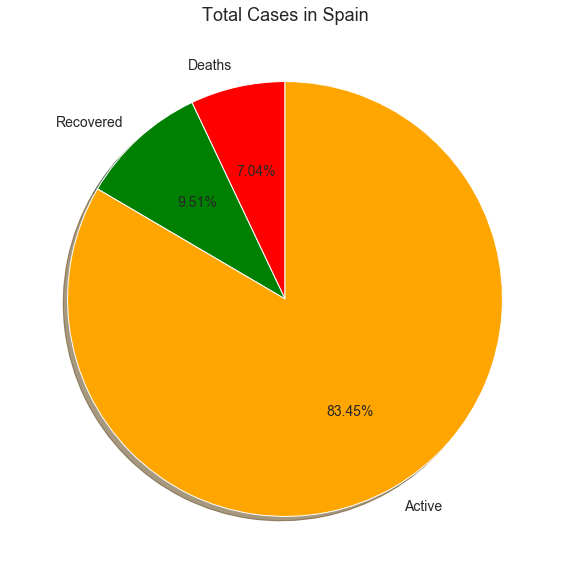

In [166]:
total_cases_pie(total_cases_spain, 'Total Cases in Spain')

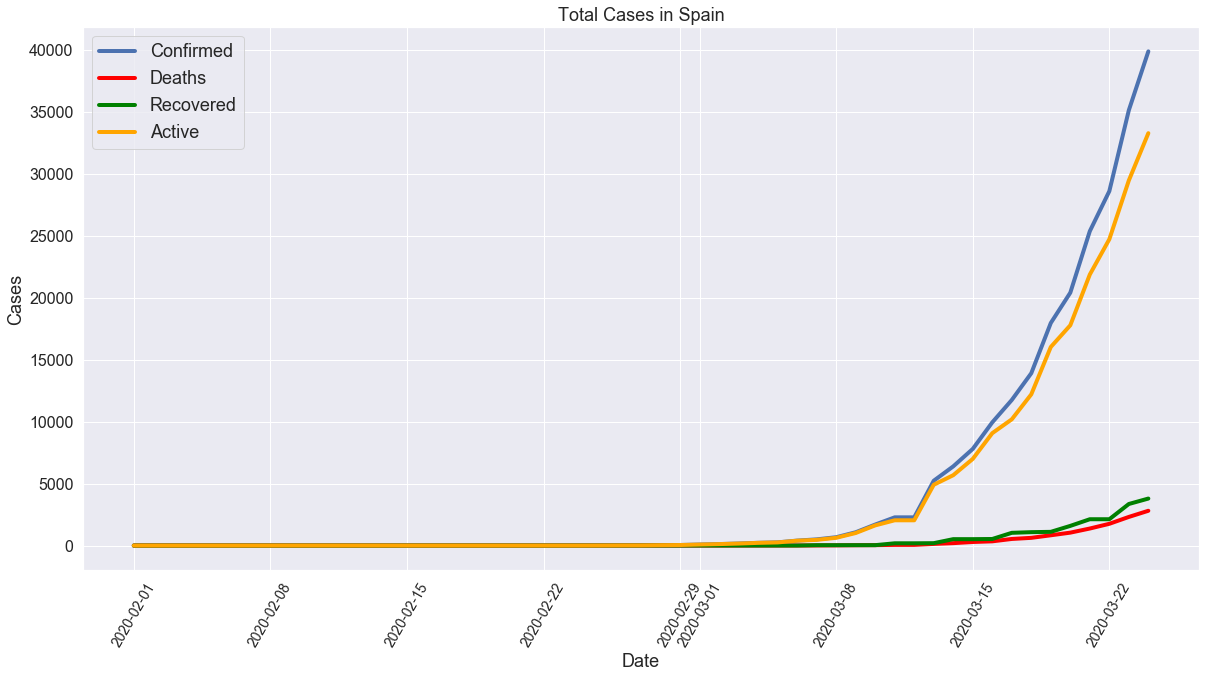

In [167]:
total_cases_lineplot(total_cases_spain, 'Total Cases in Spain')

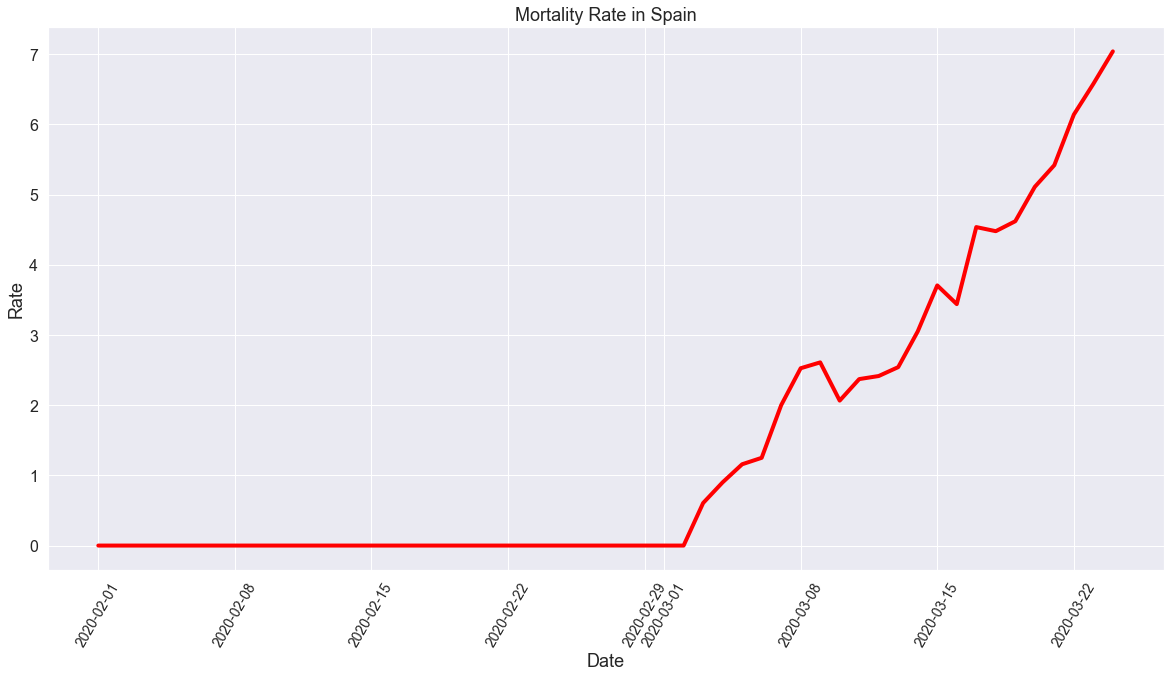

In [168]:
mortality_rate(total_cases_spain, 'Mortality Rate in Spain')

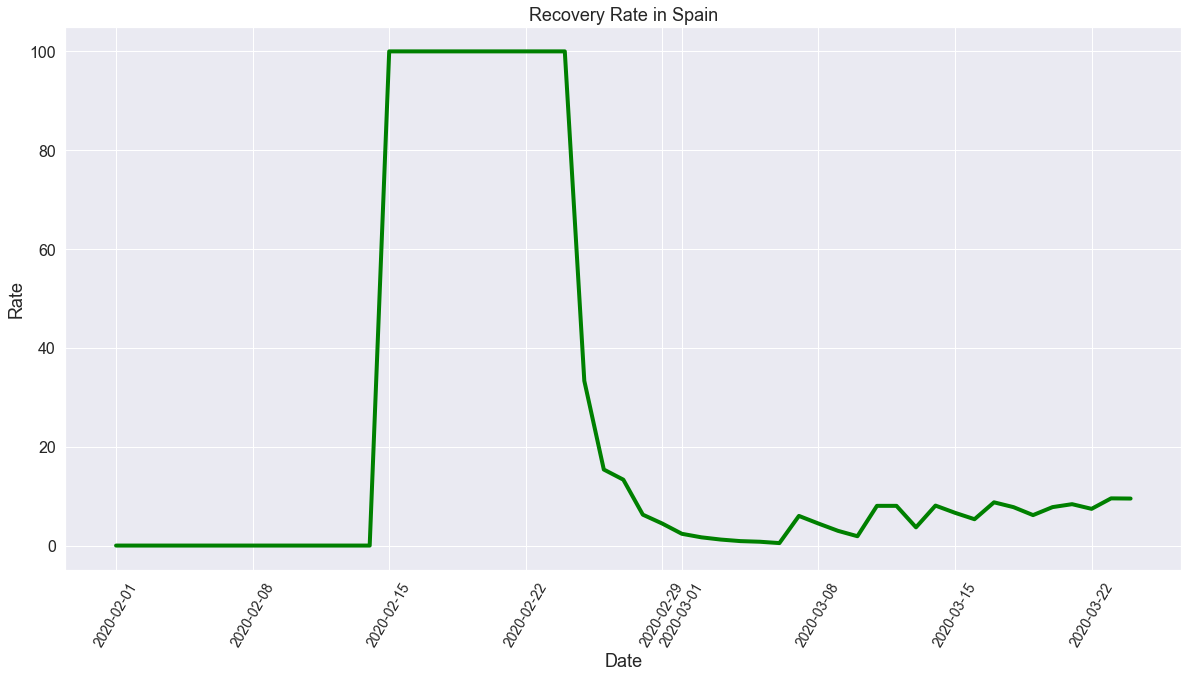

In [169]:
recovery_rate(total_cases_spain, 'Recovery Rate in Spain')

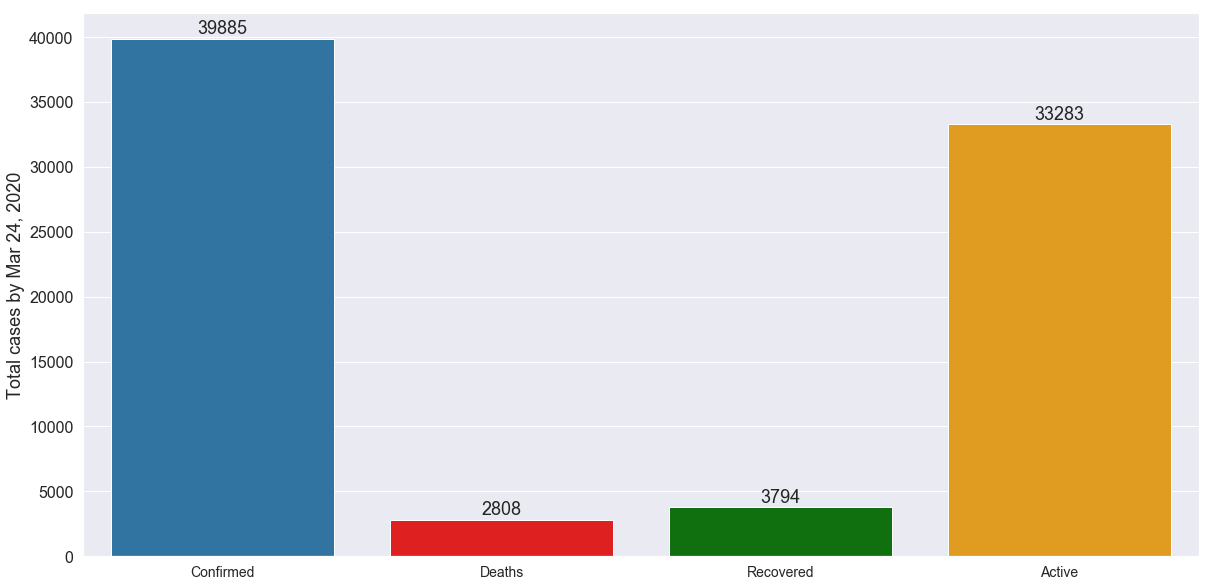

In [170]:
total_latest_barplot(total_cases_spain)

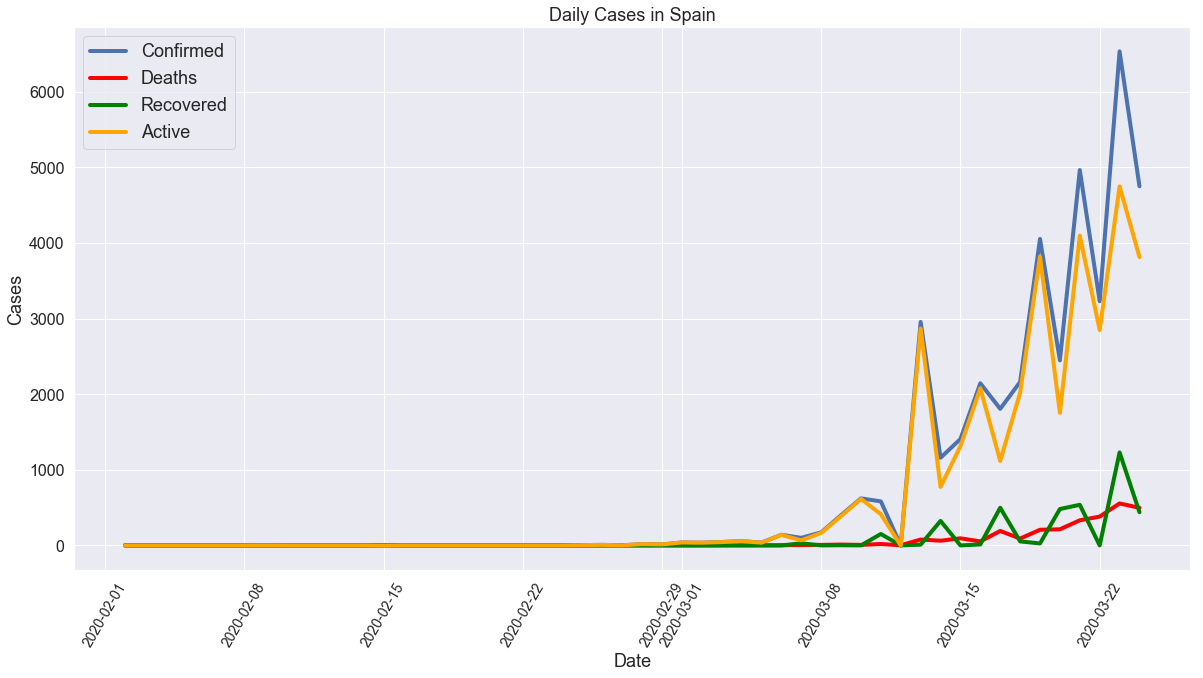

In [171]:
daily_cases(total_cases_spain, 'Daily Cases in Spain')

### Germany

In [172]:
total_cases_germany = germany.sort_values('Observed').groupby(['Observed']).sum()

In [173]:
total_cases_germany\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

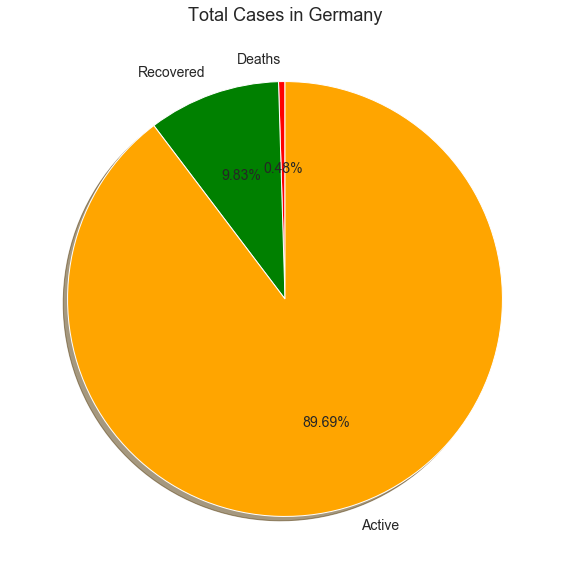

In [174]:
total_cases_pie(total_cases_germany, 'Total Cases in Germany')

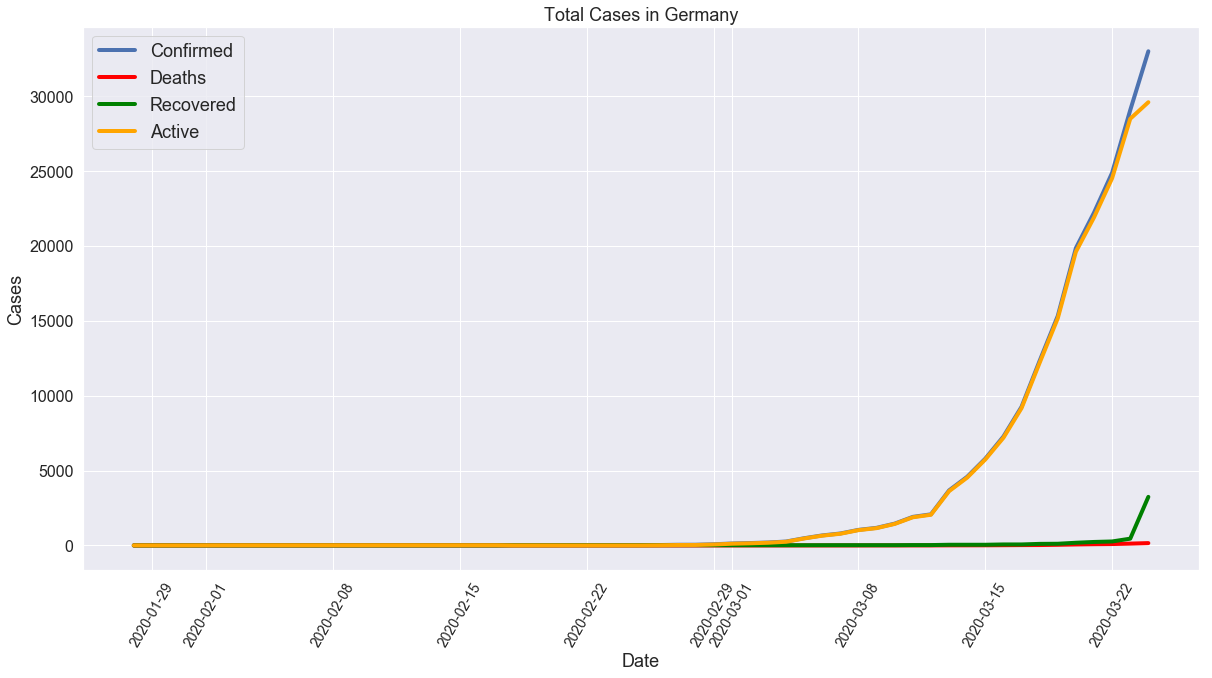

In [175]:
total_cases_lineplot(total_cases_germany, 'Total Cases in Germany')

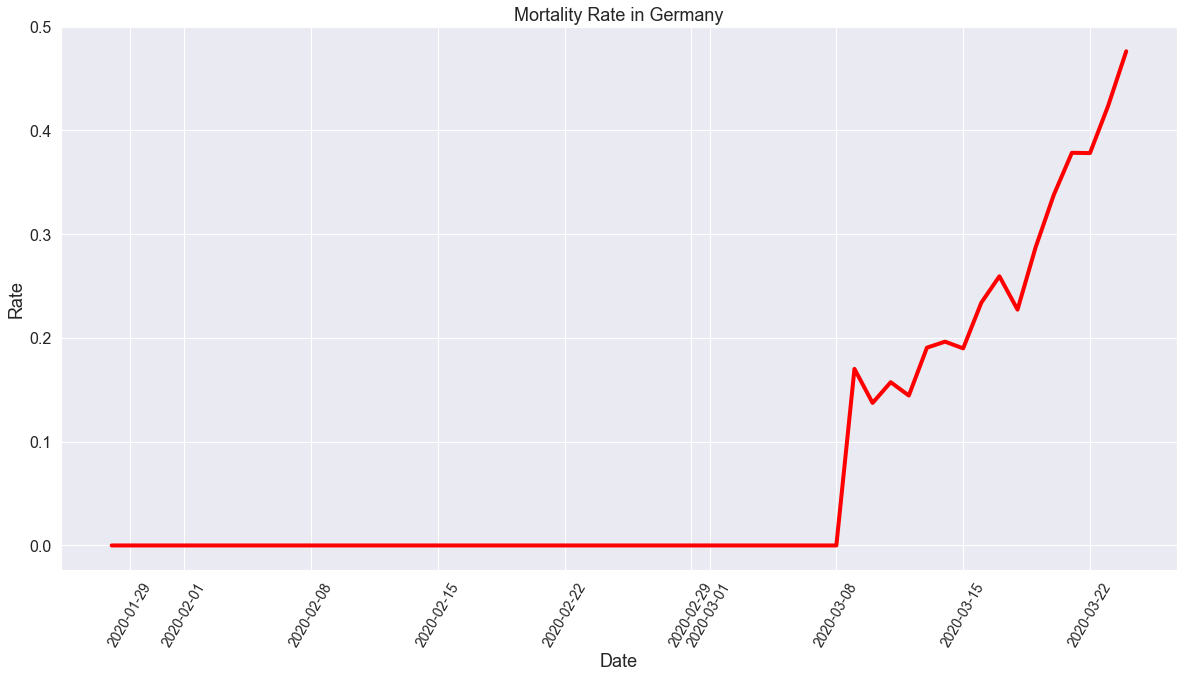

In [176]:
mortality_rate(total_cases_germany, 'Mortality Rate in Germany')

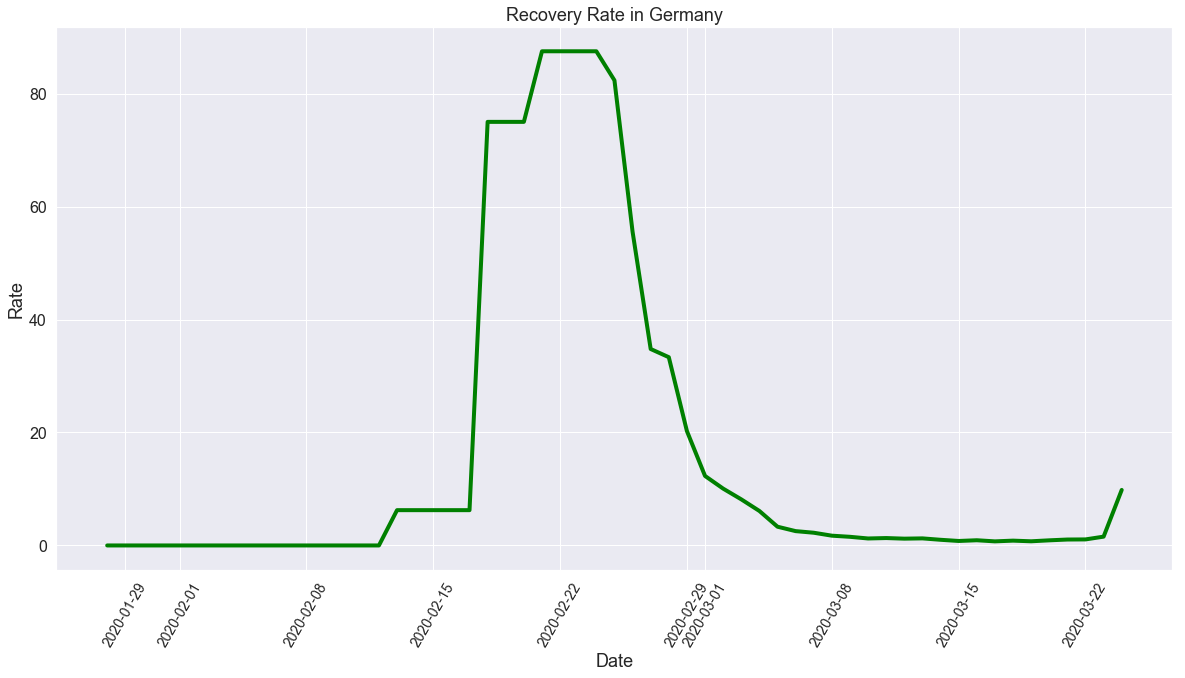

In [177]:
recovery_rate(total_cases_germany, 'Recovery Rate in Germany')

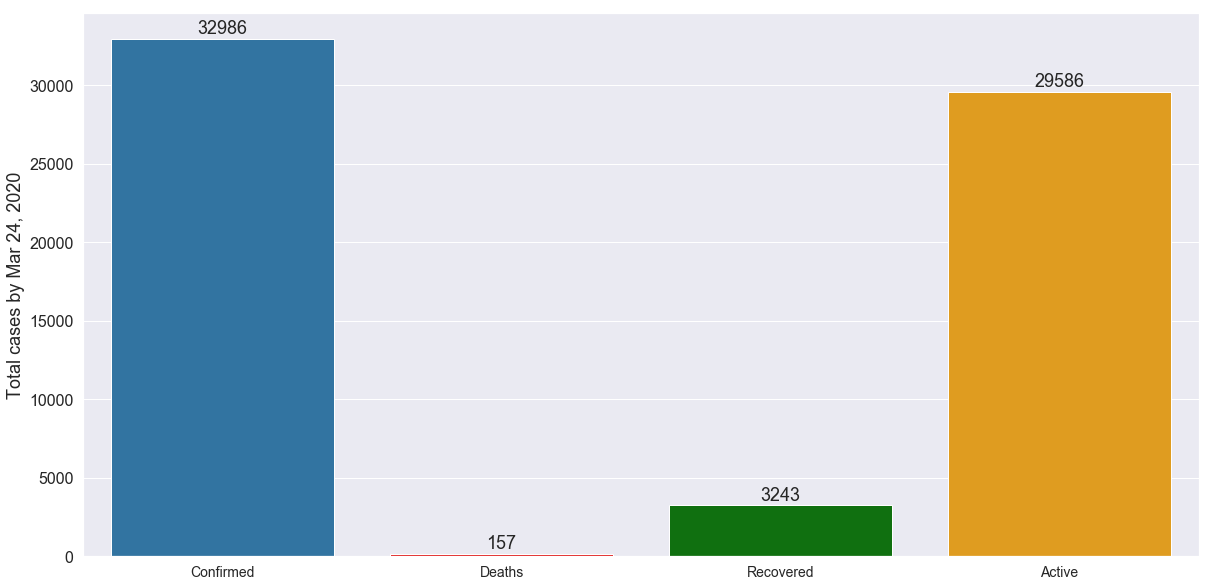

In [178]:
total_latest_barplot(total_cases_germany)

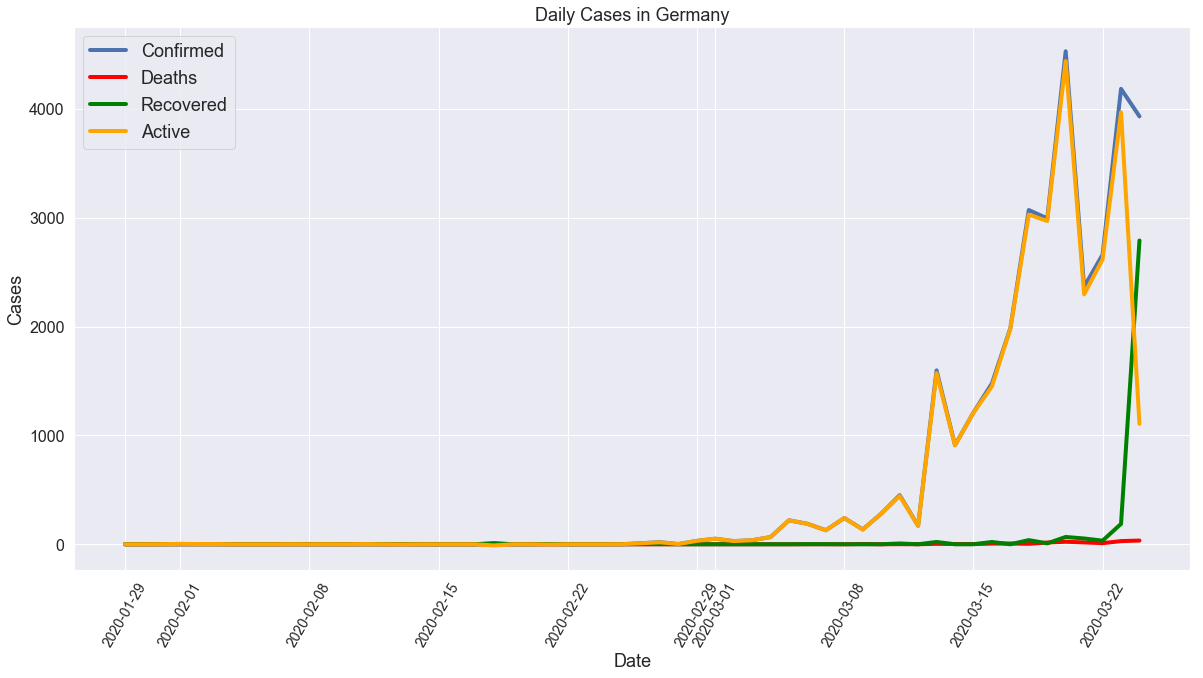

In [179]:
daily_cases(total_cases_germany, 'Daily Cases in Germany')

### France

In [180]:
total_cases_france = france.sort_values('Observed').groupby(['Observed']).sum()

In [181]:
total_cases_france\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

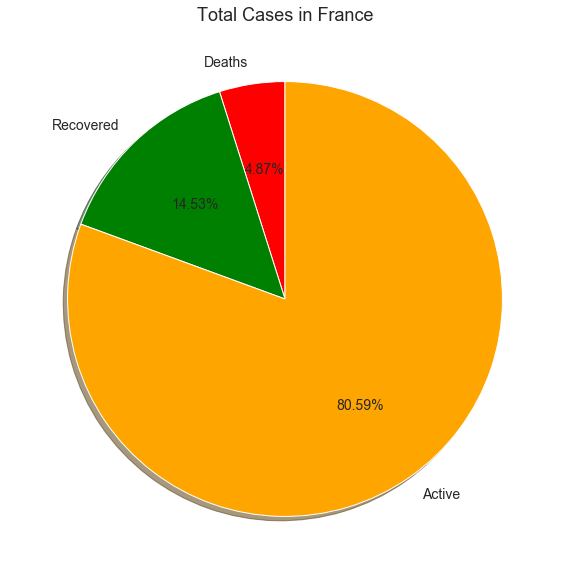

In [182]:
total_cases_pie(total_cases_france, 'Total Cases in France')

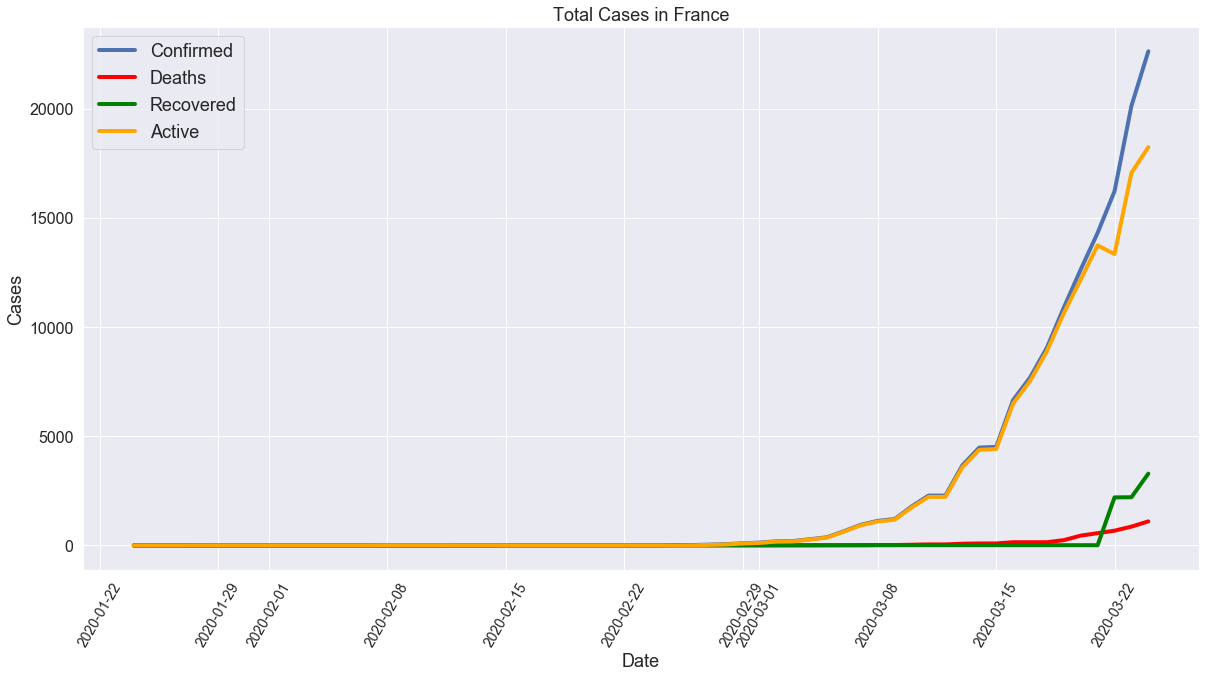

In [183]:
total_cases_lineplot(total_cases_france, 'Total Cases in France')

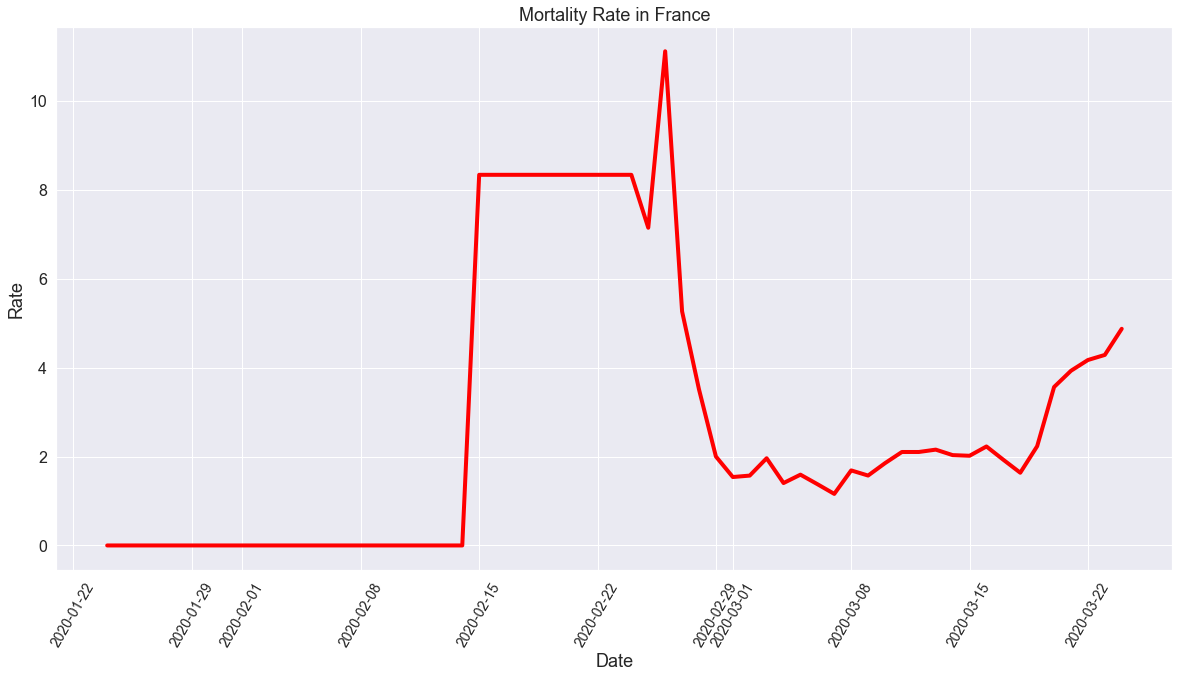

In [184]:
mortality_rate(total_cases_france, 'Mortality Rate in France')

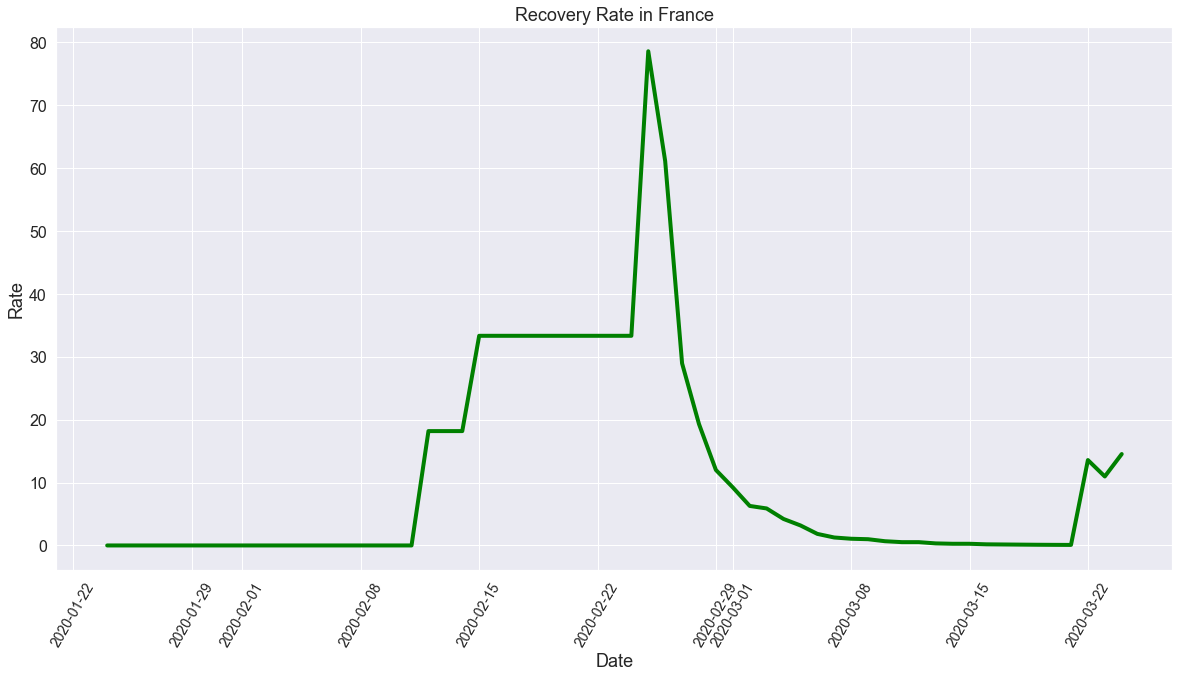

In [185]:
recovery_rate(total_cases_france, 'Recovery Rate in France')

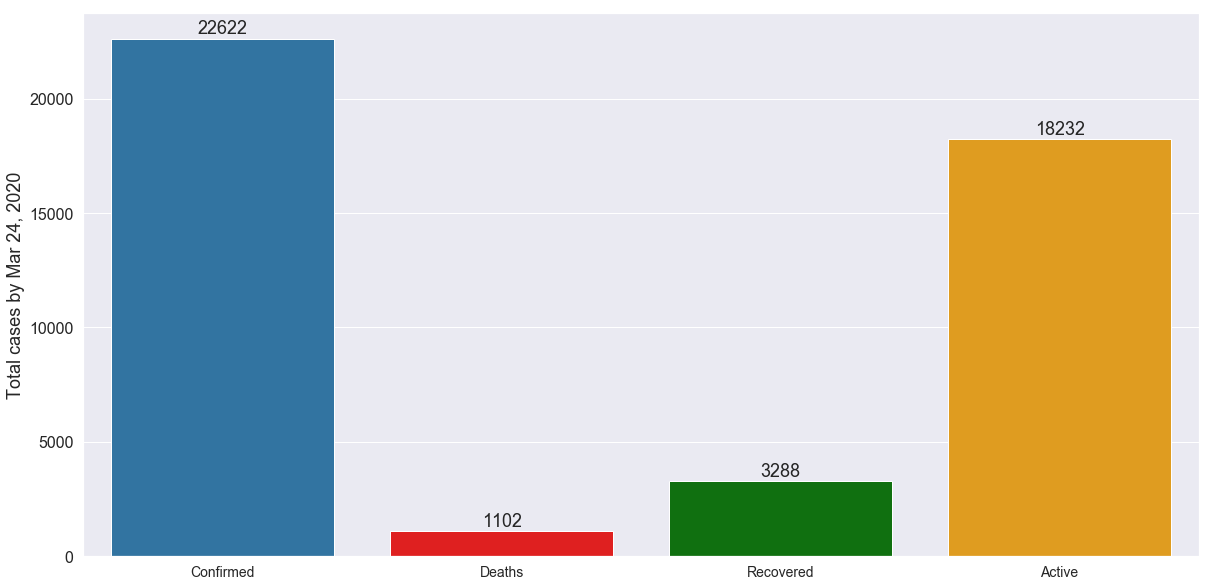

In [186]:
total_latest_barplot(total_cases_france)

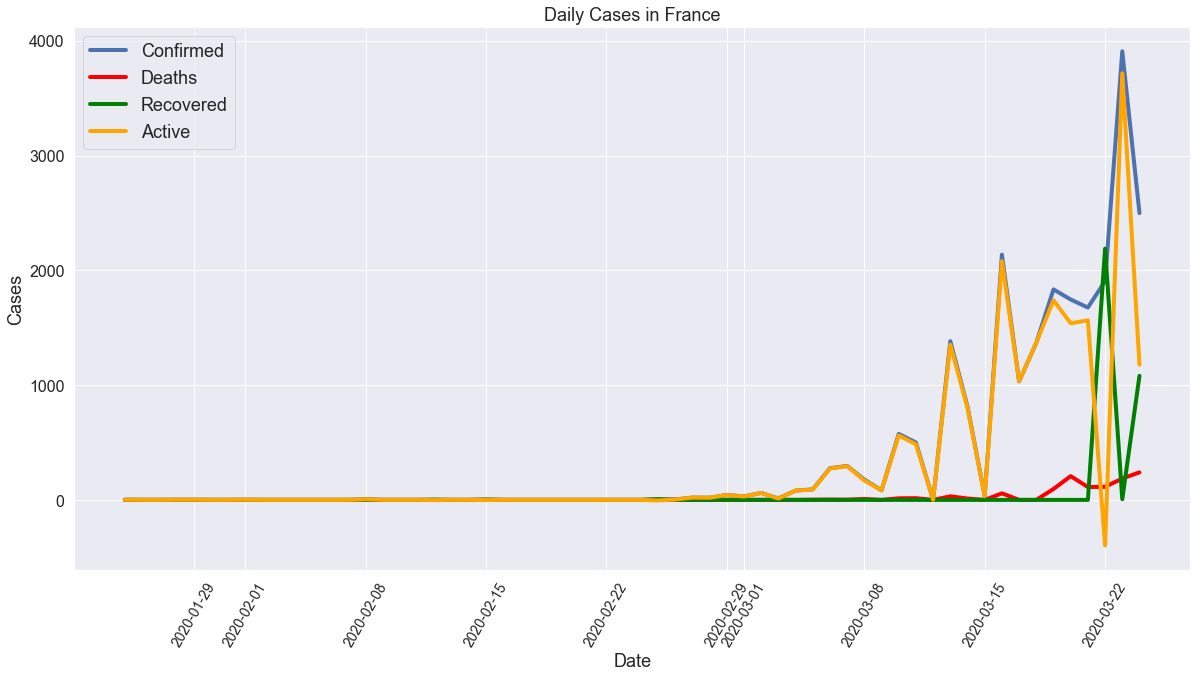

In [187]:
daily_cases(total_cases_france, 'Daily Cases in France')

### United Kingdom

In [188]:
total_cases_uk = uk.sort_values('Observed').groupby(['Observed']).sum()

In [189]:
total_cases_uk\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

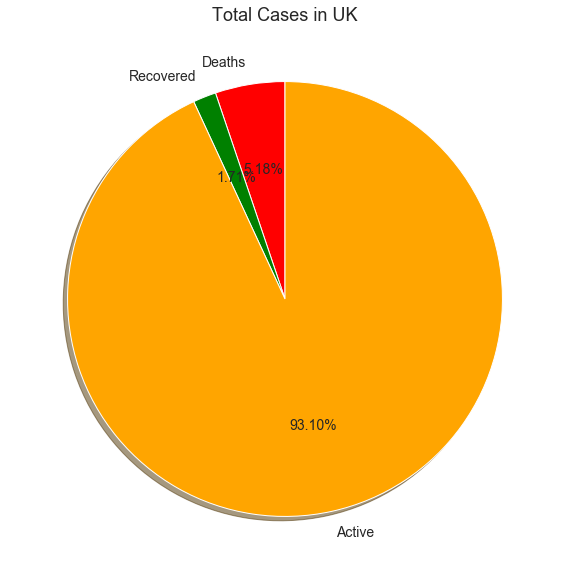

In [190]:
total_cases_pie(total_cases_uk, 'Total Cases in UK')

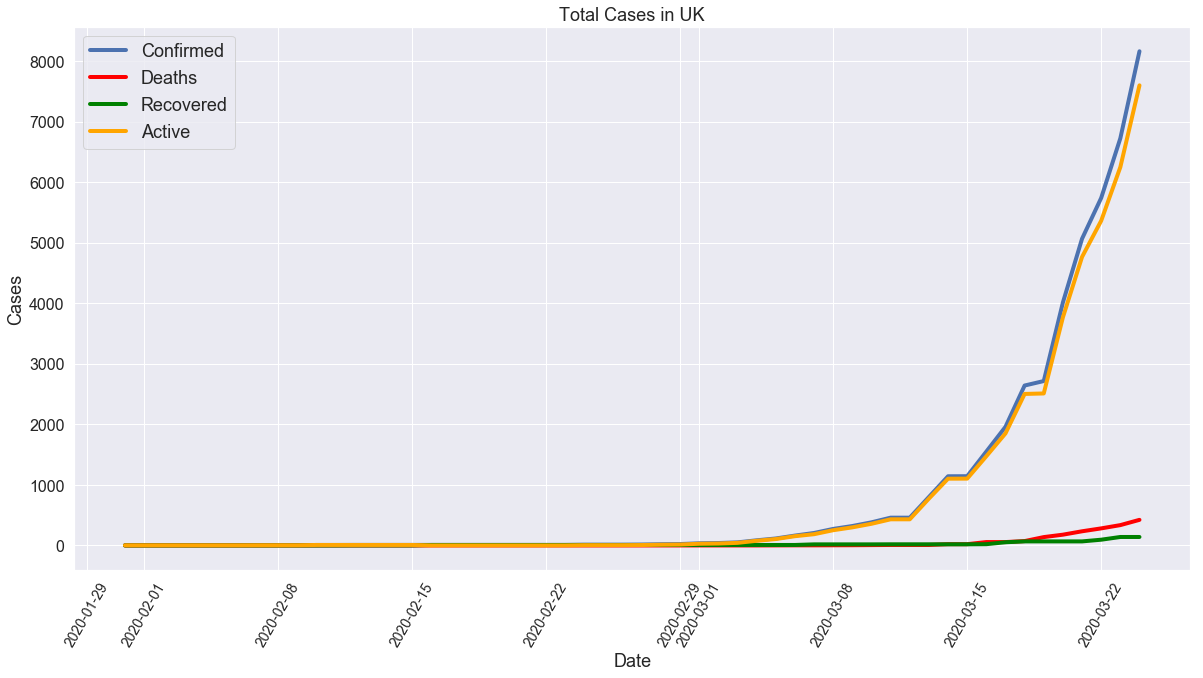

In [191]:
total_cases_lineplot(total_cases_uk, 'Total Cases in UK')

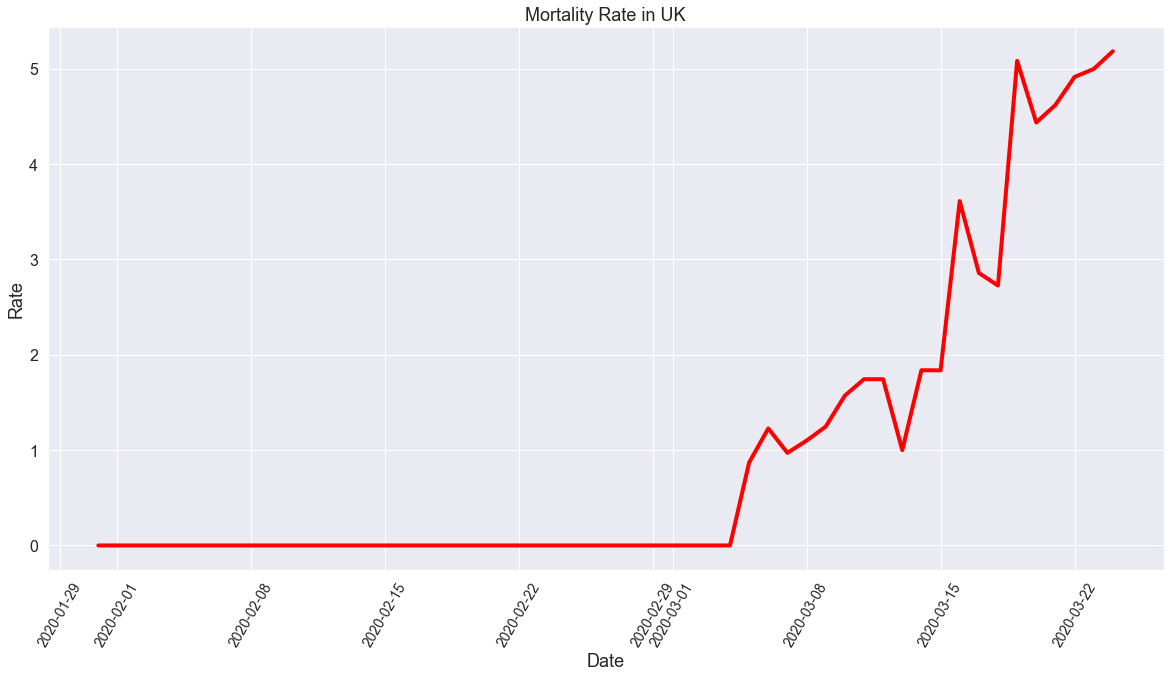

In [192]:
mortality_rate(total_cases_uk, 'Mortality Rate in UK')

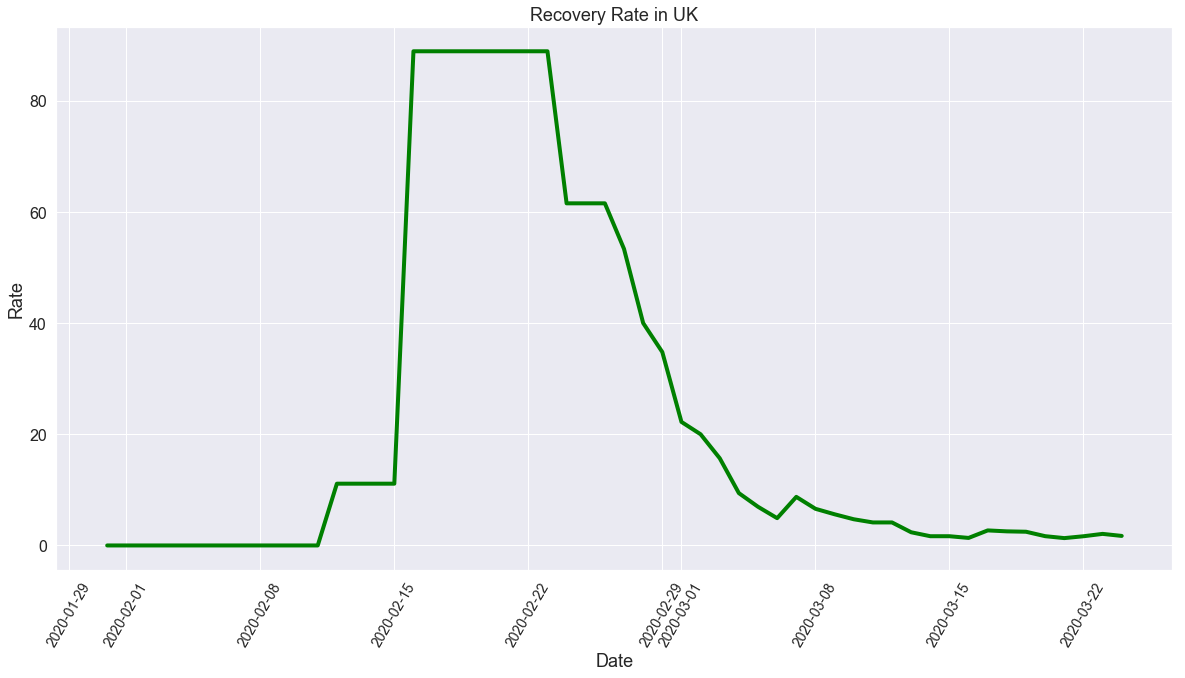

In [193]:
recovery_rate(total_cases_uk, 'Recovery Rate in UK')

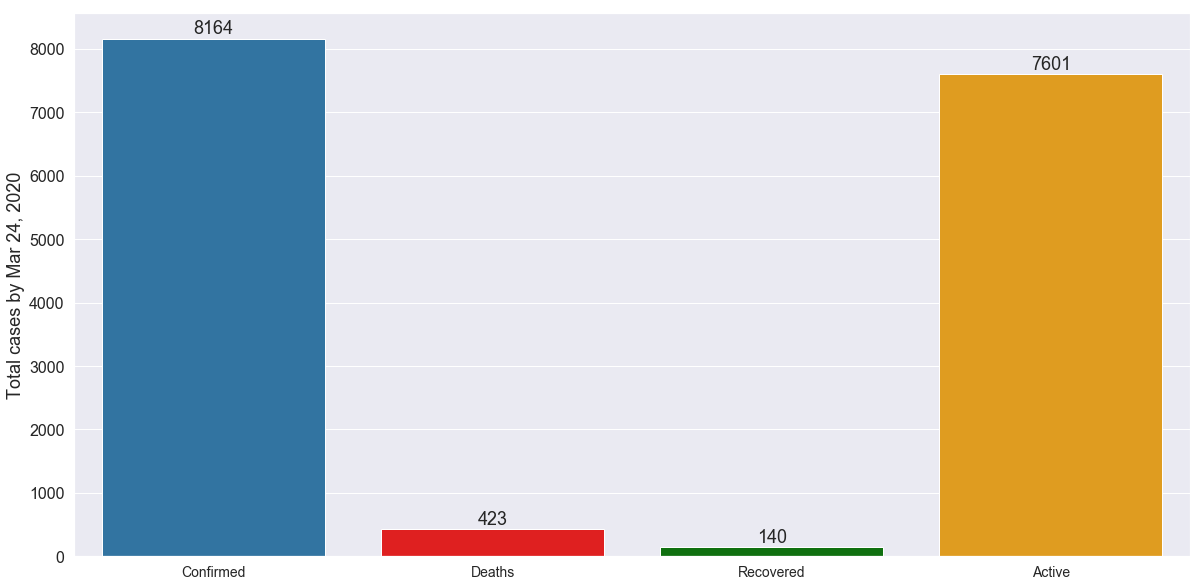

In [194]:
total_latest_barplot(total_cases_uk)

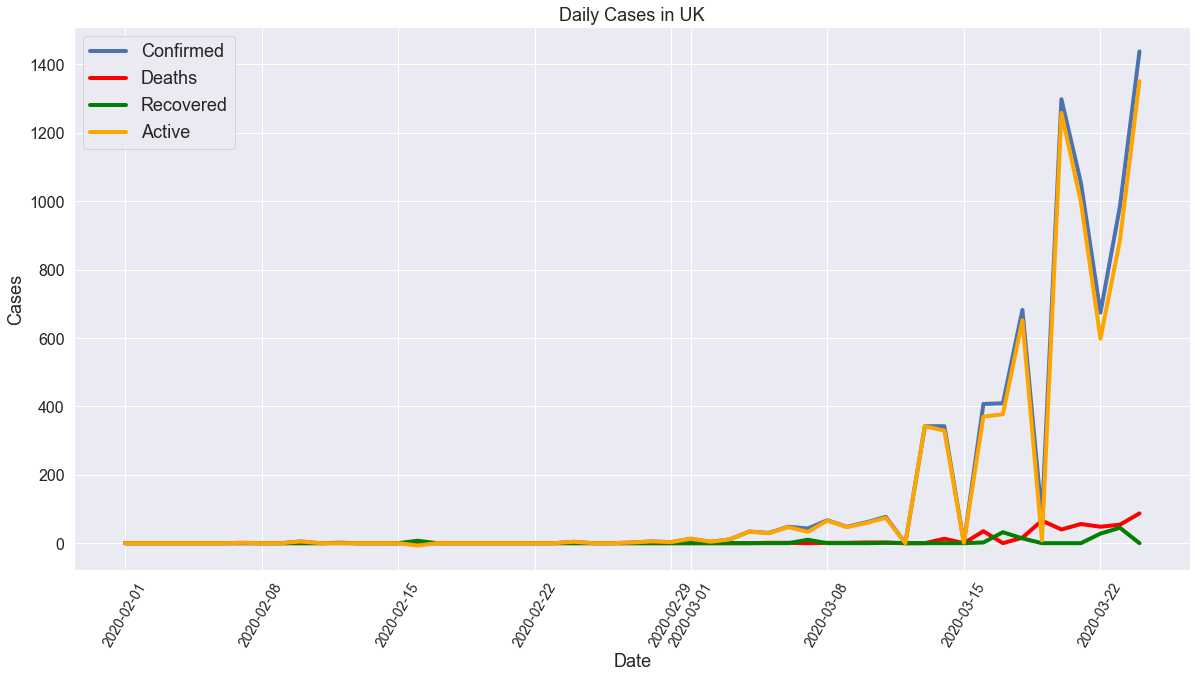

In [195]:
daily_cases(total_cases_uk, 'Daily Cases in UK')

### Switzerland

In [196]:
total_cases_ch = ch.sort_values('Observed').groupby(['Observed']).sum()

In [197]:
total_cases_ch\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

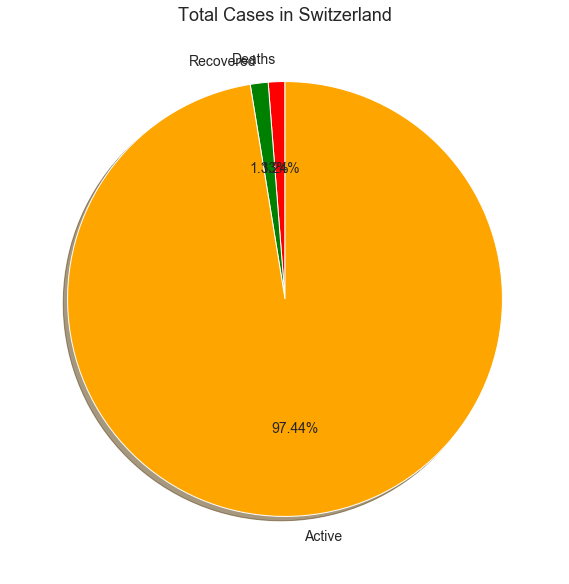

In [198]:
total_cases_pie(total_cases_ch, 'Total Cases in Switzerland')

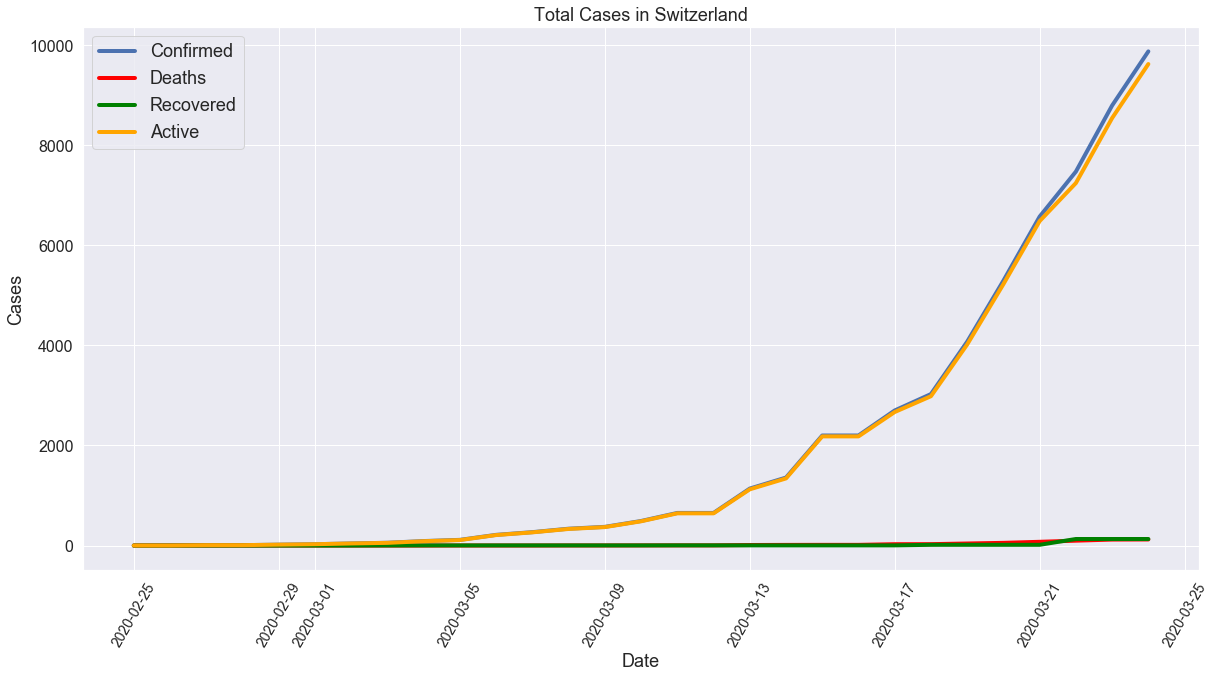

In [199]:
total_cases_lineplot(total_cases_ch, 'Total Cases in Switzerland')

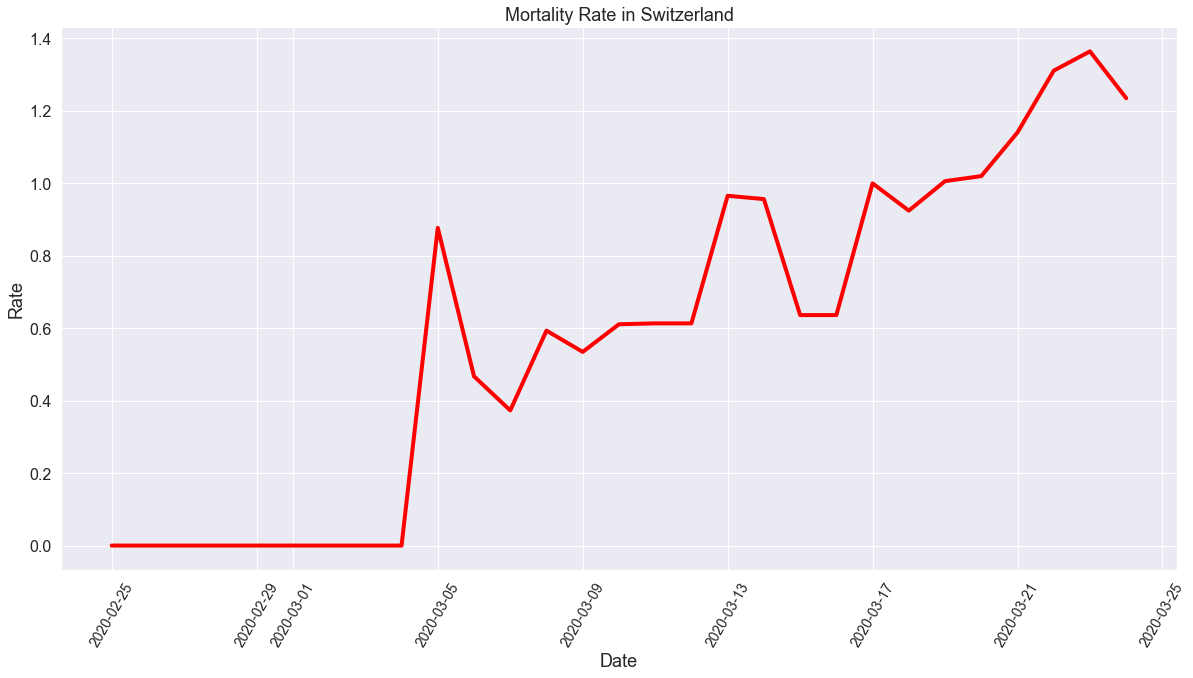

In [200]:
mortality_rate(total_cases_ch, 'Mortality Rate in Switzerland')

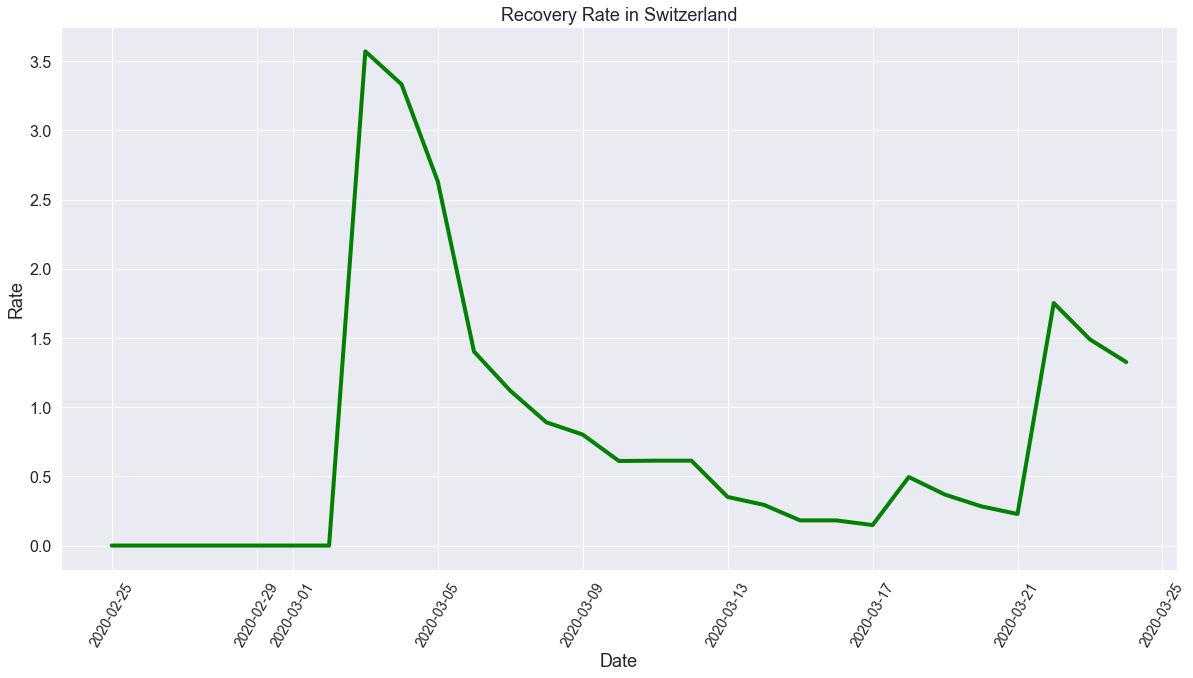

In [201]:
recovery_rate(total_cases_ch, 'Recovery Rate in Switzerland')

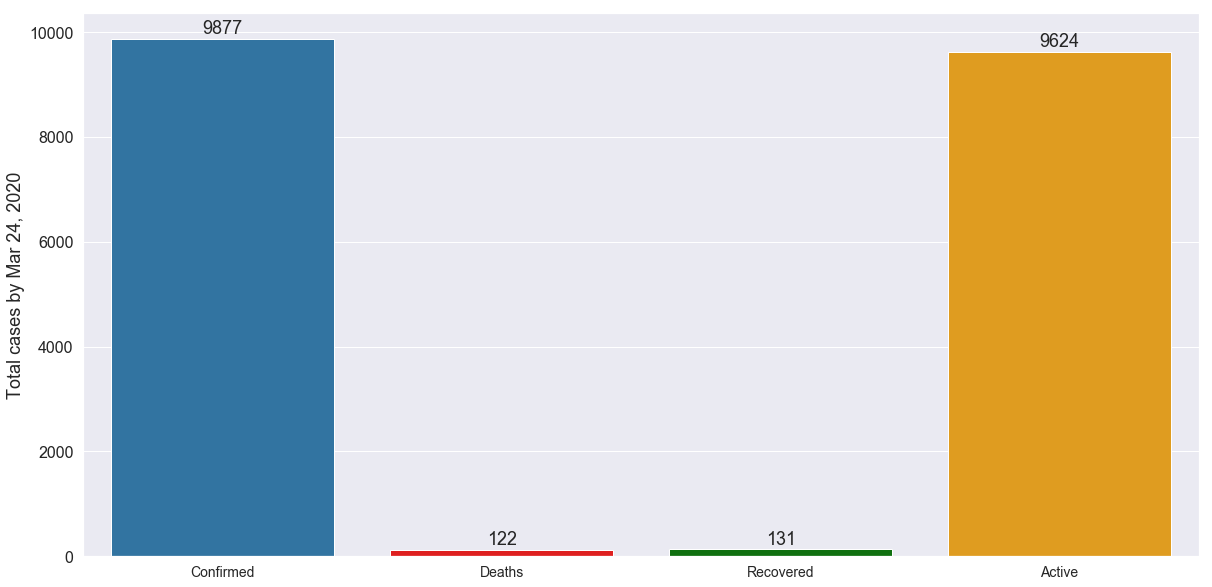

In [202]:
total_latest_barplot(total_cases_ch)

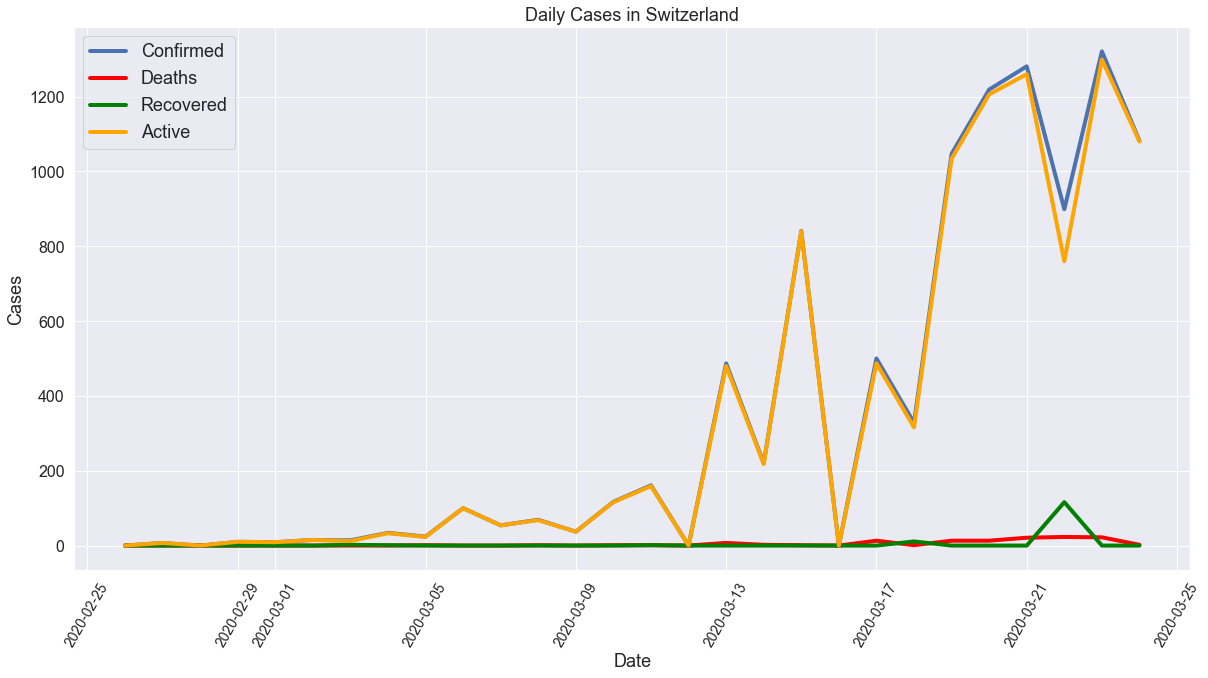

In [203]:
daily_cases(total_cases_ch, 'Daily Cases in Switzerland')

## Diamond Princess Cruise

In [86]:
set(data[data['Province/State'].apply(lambda ps: 'cruise' in ps.lower())]['Province/State'])

{'Cruise Ship', 'Diamond Princess cruise ship', 'Grand Princess Cruise Ship'}

In [87]:
diamon_princess = data[data['Province/State'] == 'Diamond Princess cruise ship'].groupby(['Observed']).sum()

In [88]:
diamon_princess\
    .sort_values('Observed', ascending=False)\
    .style.background_gradient(cmap='Reds')

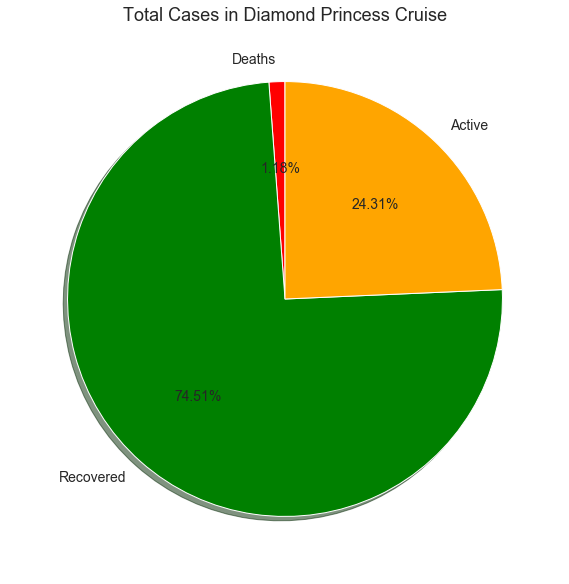

In [89]:
total_cases_pie(diamon_princess, 'Total Cases in Diamond Princess Cruise')

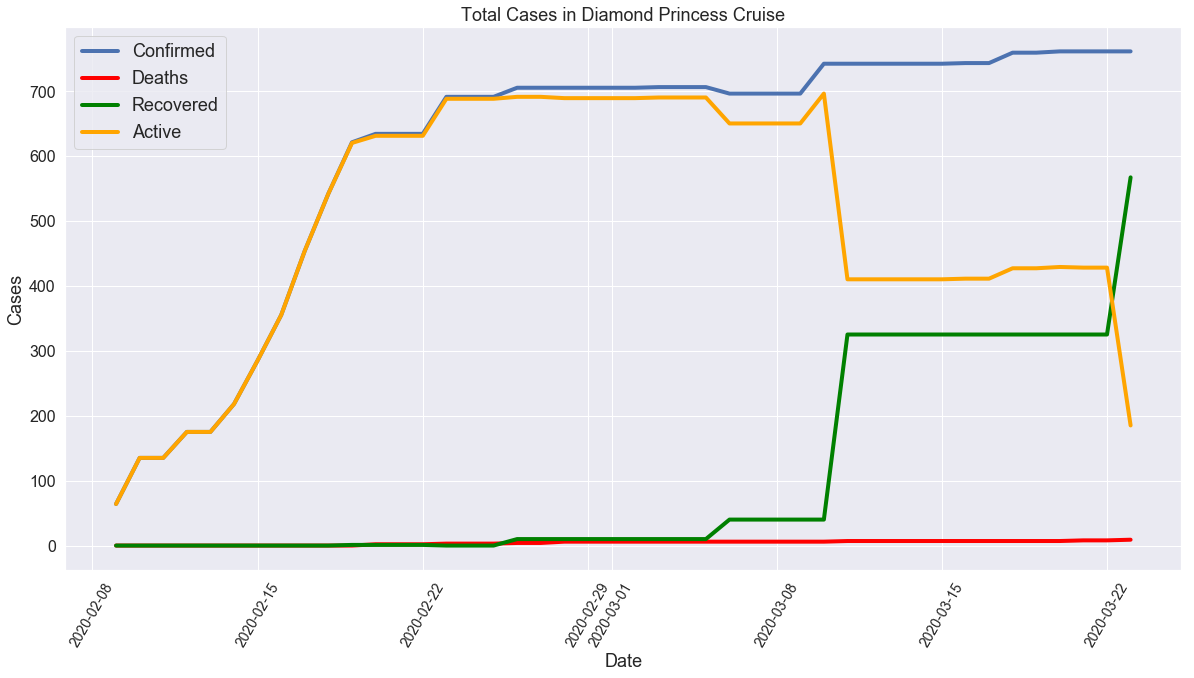

In [90]:
total_cases_lineplot(diamon_princess, 'Total Cases in Diamond Princess Cruise')

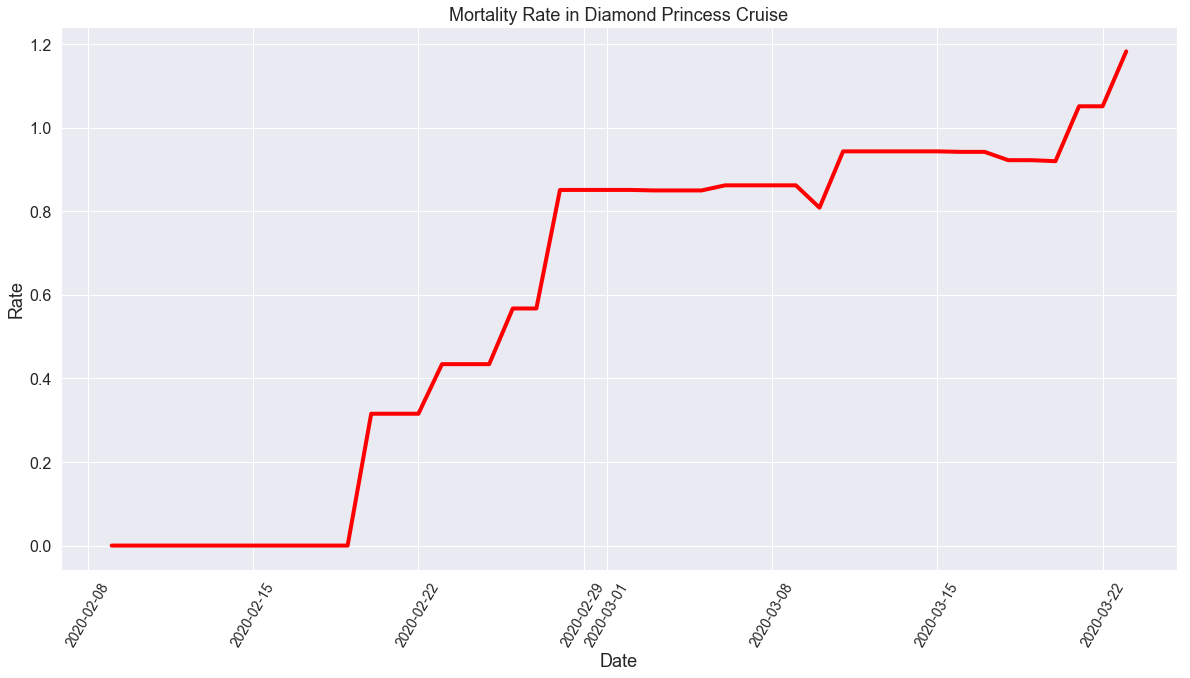

In [91]:
mortality_rate(diamon_princess, 'Mortality Rate in Diamond Princess Cruise')

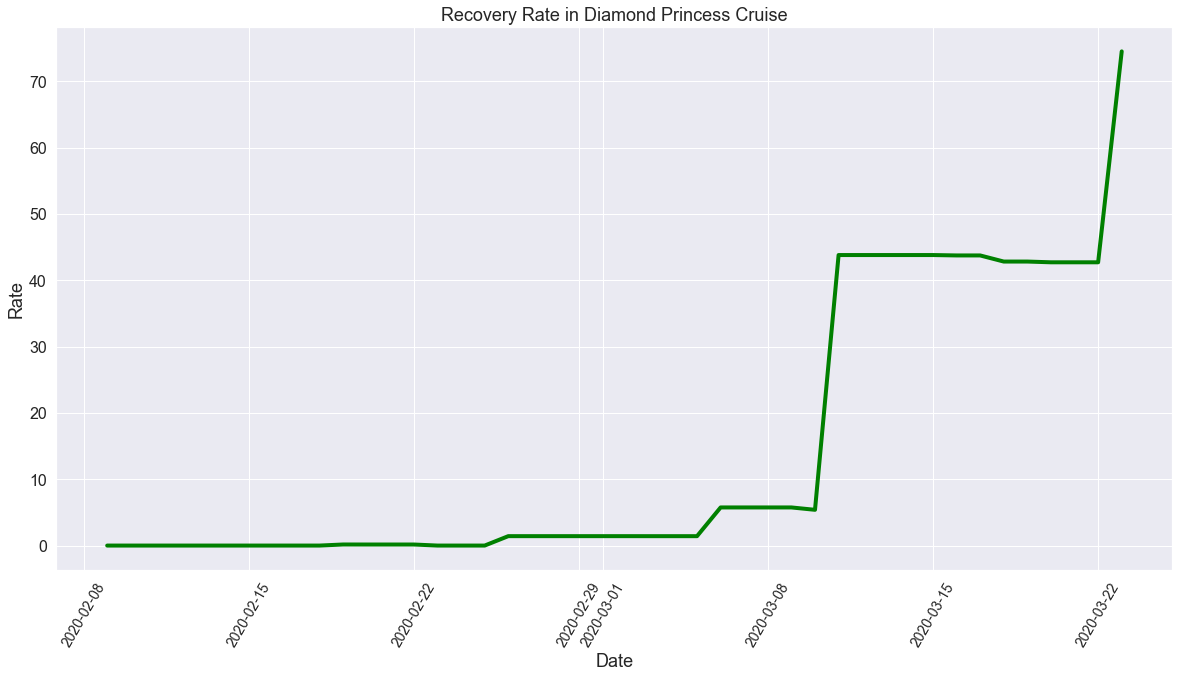

In [92]:
recovery_rate(diamon_princess, 'Recovery Rate in Diamond Princess Cruise')

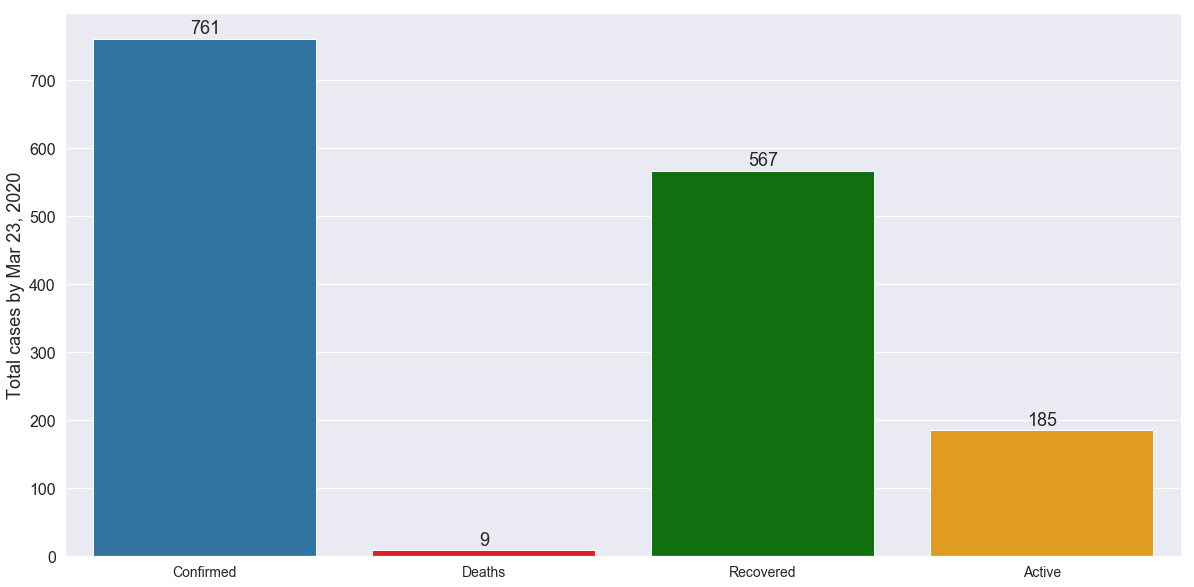

In [93]:
total_latest_barplot(diamon_princess)

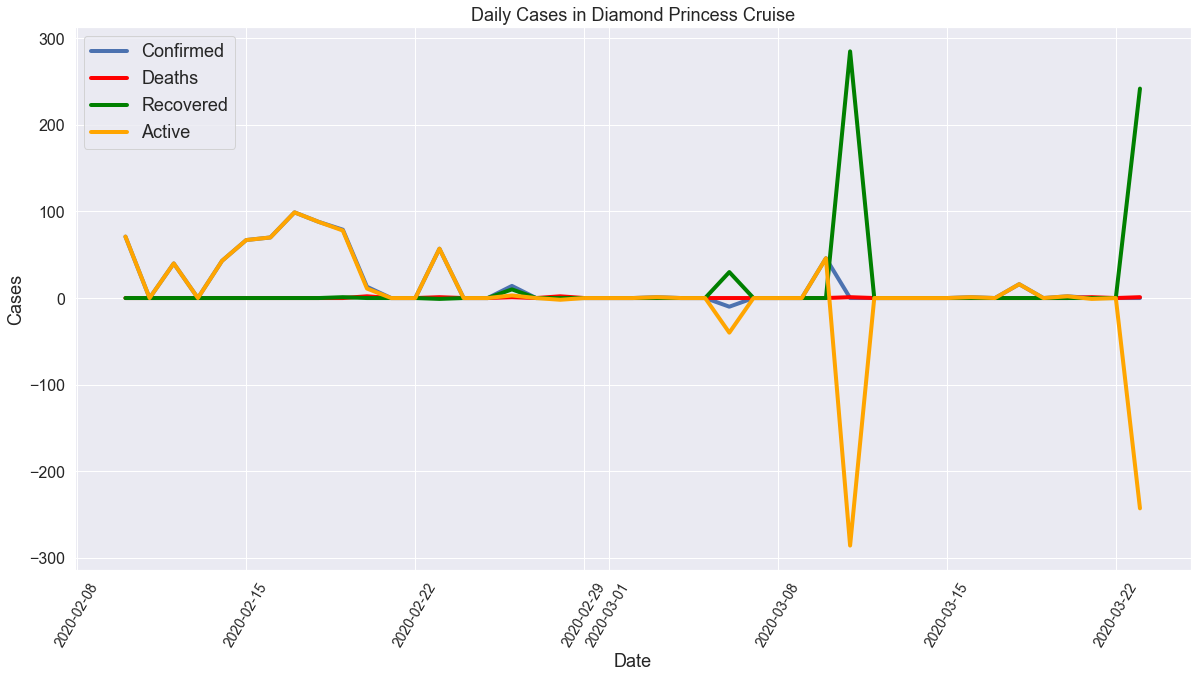

In [94]:
daily_cases(diamon_princess, 'Daily Cases in Diamond Princess Cruise')

## Loading Other Details

Dataset from https://github.com/beoutbreakprepared/nCoV2019

In [204]:
details = pd.read_csv(f'{path_to_dataset}/latestdata.csv')

In [205]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117771 entries, 0 to 117770
Data columns (total 34 columns):
ID                          117771 non-null object
age                         4210 non-null object
sex                         4500 non-null object
city                        53125 non-null object
province                    108377 non-null object
country                     117741 non-null object
wuhan(0)_not_wuhan(1)       64744 non-null float64
latitude                    114439 non-null float64
longitude                   114439 non-null float64
geo_resolution              114439 non-null object
date_onset_symptoms         1078 non-null object
date_admission_hospital     966 non-null object
date_confirmation           116549 non-null object
symptoms                    1048 non-null object
lives_in_Wuhan              1894 non-null object
travel_history_dates        758 non-null object
travel_history_location     2421 non-null object
reported_market_exposure    1128 non-nu

### Listing Symptoms

In [206]:
symptoms = sorted([ item for item in list(set(details['symptoms'])) if type(item) == str])
symptoms = list(filter(lambda s: re.search('\D', s, re.I), symptoms))

In [207]:
dfSymptoms = pd.DataFrame.from_dict({'Symptoms': symptoms})


# Aligning to the left
dfSymptoms.style\
    .hide_index()\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

### Age Distribution

In [208]:
def process_age_column(age_range):
    try:
        return np.mean(list(map(lambda age: int(age), age_range.split('-'))))
    except:
        return None

In [209]:
ages = details['age'].apply(process_age_column)

In [210]:
ages = ages[ages.isna() == False]

In [211]:
ages.describe()

count    4171.000000
mean       48.595181
std        17.529569
min         1.000000
25%        34.500000
50%        48.000000
75%        62.000000
max        97.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages for all the Observed Cases')

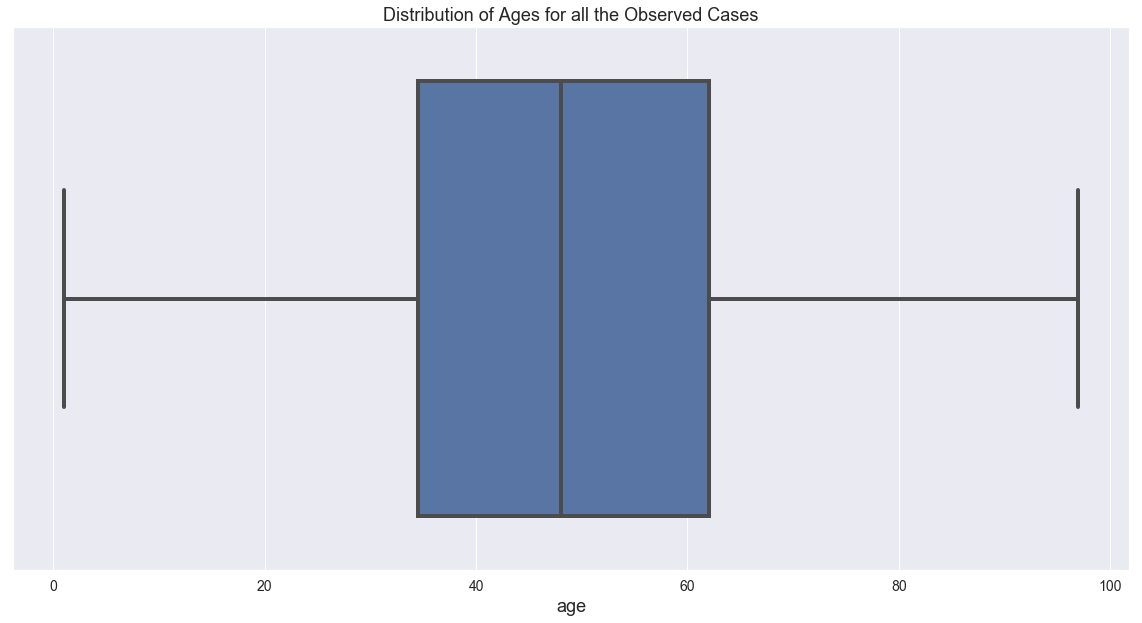

In [212]:
sns.boxplot(ages)
plt.title('Distribution of Ages for all the Observed Cases')

### Sex Distribution

In [213]:
sex = details[details['sex'].isnull() == False]['sex'].apply(lambda sex: sex.lower()).value_counts()

Text(0.5, 1.0, 'Sex Distribution for all the Observed Cases')

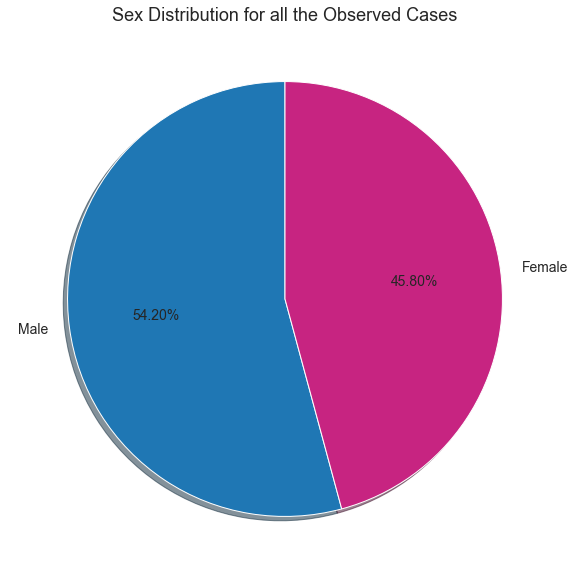

In [214]:
plt.pie(sex, 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Sex Distribution for all the Observed Cases')

### Based on Outcome

In [215]:
outcome = details[details['outcome'].isnull() == False][['age', 'sex', 'outcome']]

In [216]:
set(outcome['outcome'].apply(lambda x: x.lower()))

{'critical condition, intubated as of 14.02.2020',
 'dead',
 'death',
 'died',
 'discharge',
 'discharged',
 'discharged from hospital',
 'not hospitalized',
 'recovered',
 'recovering at home 03.03.2020',
 'released from quarantine',
 'severe',
 'stable',
 'symptoms only improved with cough. currently hospitalized for follow-up.',
 'treated in an intensive care unit (14.02.2020)'}

In [217]:
def process_outcome(outcome):
    outcome = outcome.lower()
    if outcome == 'dead' or outcome == 'death' or outcome == 'died':
        return 'dead'
    elif re.search('discharge', outcome) or re.search('recover', outcome) or re.search('released', outcome):
        return 'recovered'
    elif re.search('critical', outcome) or re.search('intensive care', outcome) or outcome == 'severe':
        return 'critical'
    elif outcome == 'not hospitalized':
        return outcome
    elif re.search('currently hospitalized', outcome):
        return 'stable'
    else:
        return 'Unknown'

outcome['outcome'] = outcome['outcome'].apply(process_outcome)

#### Critical Cases by Age

In [218]:
critical_by_age = outcome[\
                       (outcome['age'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['age'].apply(process_age_column)

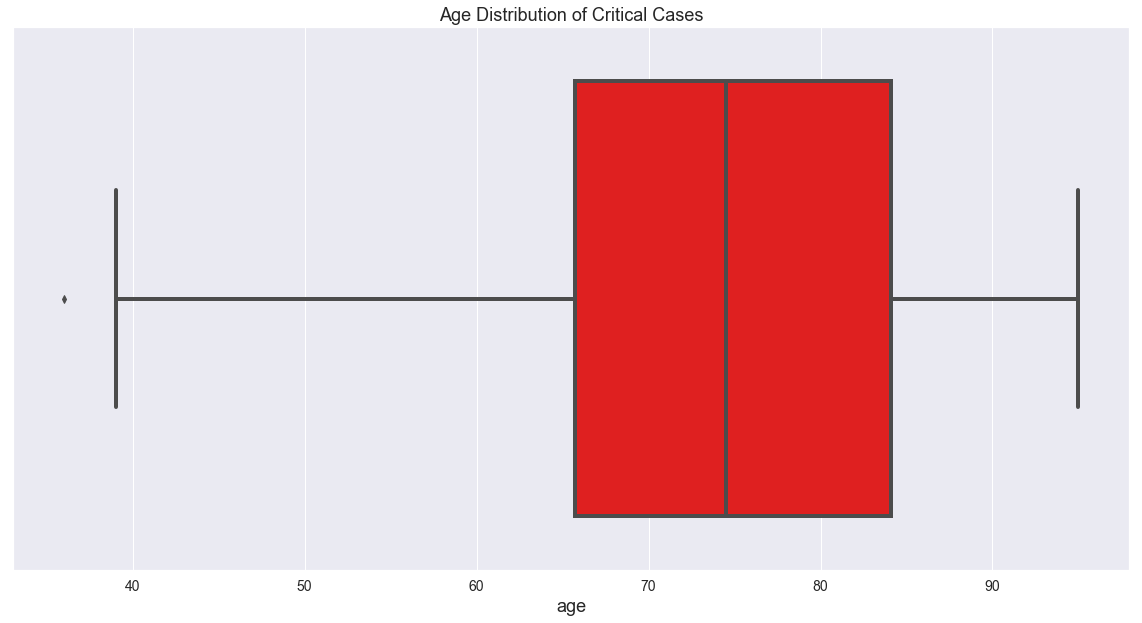

In [219]:
sns.boxplot(critical_by_age, color='red')
_ = plt.title('Age Distribution of Critical Cases')

#### Critical Cases by Sex

In [220]:
critical_by_sex = outcome[\
                       (outcome['sex'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['sex']

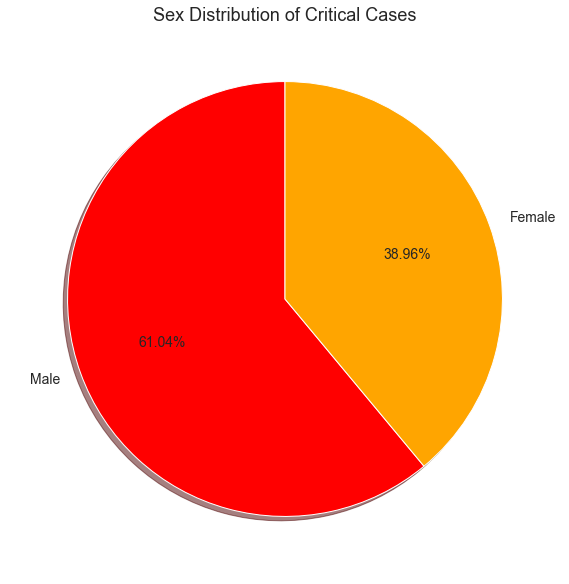

In [221]:
plt.pie(critical_by_sex.value_counts(), 
        labels=['Male', 'Female'], 
        colors=['red', 'orange'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
_ = plt.title('Sex Distribution of Critical Cases')